<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Libraries](#1)
* [2. Reading the Data](#2)
    - [1.1 An Overview from the Data](#2.1)
* [3. Exploratory Data Analysis](#3) 
    - [3.1 Total Orders on E-Commerce](#3.1)
    - [3.2 E-Commerce Around Brazil](#3.2)
    - [3.3 E-Commerce Impact on Economy](#3.3)
    - [3.4 Payment Type Analysis](#3.4)
* [4. Natural Language Processing](#4)
    - [4.1 Data Understanding](#4.1)
    - [4.2 Regular Expressions](#4.2)
        - [4.2.1 Break Line and Carriage Return](#4.2.1)
        - [4.2.2 Sites and Hiperlinks](#4.2.2)
        - [4.2.3 Dates](#4.2.3)
        - [4.2.4 Money](#4.2.4)
        - [4.2.5 Numbers](#4.2.5)
        - [4.2.6 Negation](#4.2.6)
        - [4.2.7 Special Characteres](#4.2.7)
        - [4.2.8 Additional Whitespaces](#4.2.8)
    - [4.3 Stopwords](#4.3)
    - [4.4 Stemming](#4.4)
    - [4.5 Feature Extraction](#4.5)
        - [4.5.1 CountVectorizer](#4.5.1)
        - [4.5.2 TF-IDF](#4.5.2)
    - [4.6 Labeling Data](#4.6)
    - [4.7 Pipeline](#4.7)
* [5. Sentiment Classification](#5)
* [6. Final Implementation](#6)
* [7. Conclusion](#7)
* [8. Complete Script](#8)

The objective of this notebook is to propose an analytical view of e-commerce relationship in Brazil. For this we will first go trough an exploratory data analysis using graphical tools to create self explanatory plots for better understanding what is behind braziian online purchasing. Finally we will look at customers reviews and implement **_Sentimental Analysis_** to make a text classification using **_Natural Language Process_** tools.

We will go trough a extensive journey for understanding the data and plotting some useful charts to clarify the concepts and get insights from data and, at the end, we will go trough a step-by-step code on text preparating and sentiment classification using the reviews left from customer on online platforms. I hope you enjoy this notebook!

Before getting to work, I want to thanks [Raeshid David](https://www.kaggle.com/raenish) for sharing his content and inspiring the style and organization of this notebook.

___
__*Important Update:*__ I'm proud to see that the job here grew up so far spreading insights among a lot of Kagglers. So, I want to share with you the development of a personal project called "Sentimentor API". The idea is to train a sentiment classification model to be put into a front-end interface so users can input their own data (text strings ou excel/csv files) and take a look at the sentiment prediction given by this model. 

For now, the idea is literally at the very beginning and you can take a look on my [github](https://github.com/ThiagoPanini/sentiment-analysis-ecommerce).
___

___
__*Important Update 2:*__ At the last session of this notebook, I shared with you what I consider as a "real production implementation" for creating a sentiment classification model using olist reviews data. The idea is to bring some real problems solved in a end-to-end python script with all we should have in a day-to-day work. I hope you enjoy it!
___

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Libraries</b></font>

In [1]:
pip install folium --upgrade

     |████████████████████████████████| 102kB 659kB/s 
  Found existing installation: folium 0.10.0
    Uninstalling folium-0.10.0:
      Successfully uninstalled folium-0.10.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

# Utilities
from viz_utils import *
from custom_transformers import *
from ml_utils import *

# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Reading the Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

For this task we have differente data sources, each one describing a specific topic related to e-commerce sales. The files are:

    olist_customers_dataset.csv
    olist_geolocation_dataset.csv
    olist_orders_dataset.csv
    olist_order_items_dataset.csv
    olist_order_payments_dataset.csv
    olist_order_reviews_dataset.csv
    olist_products_dataset.csv
    olist_sellers_dataset.csv
    product_category_name_translation.csv
    
The relationship between these files are described on the documentation. So let's read the datasets and make an initial analysis with all of them. This step will help us a lot to take right decisions in a future exploratory data analysis.

In [3]:
# Reading all the files
raw_path = '../input/brazilian-ecommerce/'
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

<a id="2.1"></a>
<font color="dimgrey" size=+2.0><b>2.1 An Overview from the Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Before creating a unique dataset with all useful information, let's look at the shape of each dataset, so we can be more assertive on how to use joining statements. 

In [4]:
# Collections for each dataset
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments,
            olist_order_reviews, olist_products, olist_sellers]
names = ['olist_customer', 'olist_geolocation', 'olist_orders', 'olist_order_items', 'olist_order_payments',
         'olist_order_reviews', 'olist_products', 'olist_sellers']

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

Now let's use a homemade function found on the module `viz_utils.py` for looking at each dataset and bring some detailed parameters about the data content. With this function we can get the following information for each dataset column:

    - Column name;
    - Null amount;
    - Null percentage among the respective dataset;
    - Data type;
    - total categorical entries;

In [5]:
df_overview = pd.DataFrame({})
name_col = []
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1]
    df_overview = df_overview.append(data_overview(df))
    df_overview['dataset_name'] = name_col

df_overview = df_overview.loc[:, ['dataset_name', 'feature', 'qtd_null', 'percent_null', 'dtype', 'qtd_cat']]
df_overview

dataset_name                        feature  qtd_null  \
0        olist_customer                    customer_id         0   
1        olist_customer             customer_unique_id         0   
2        olist_customer       customer_zip_code_prefix         0   
3        olist_customer                  customer_city         0   
4        olist_customer                 customer_state         0   
0     olist_geolocation    geolocation_zip_code_prefix         0   
1     olist_geolocation                geolocation_lat         0   
2     olist_geolocation                geolocation_lng         0   
3     olist_geolocation               geolocation_city         0   
4     olist_geolocation              geolocation_state         0   
0          olist_orders  order_delivered_customer_date      2965   
1          olist_orders   order_delivered_carrier_date      1783   
2          olist_orders              order_approved_at       160   
3          olist_orders                       order_id         0   
4          olist_orders                    customer_id         0   
5          olist_orders                   order_status         0   
6          olist_orders       order_purchase_timestamp         0   
7          olist_orders  order_estimated_delivery_date         0   
0     olist_order_items                       order_id         0   
1     olist_order_items                  order_item_id         0   
2     olist_order_items                     product_id         0   
3     olist_order_items                      seller_id         0   
4     olist_order_items            shipping_limit_date         0   
5     olist_order_items                          price         0   
6     olist_order_items                  freight_value         0   
0  olist_order_payments                       order_id         0   
1  olist_order_payments             payment_sequential         0   
2  olist_order_payments                   payment_type         0   
3  olist_order_payments           payment_installments         0   
4  olist_order_payments                  payment_value         0   
0   olist_order_reviews           review_comment_title     88285   
1   olist_order_reviews         review_comment_message     58247   
2   olist_order_reviews                      review_id         0   
3   olist_order_reviews                       order_id         0   
4   olist_order_reviews                   review_score         0   
5   olist_order_reviews           review_creation_date         0   
6   olist_order_reviews        review_answer_timestamp         0   
0        olist_products          product_category_name       610   
1        olist_products            product_name_lenght       610   
2        olist_products     product_description_lenght       610   
3        olist_products             product_photos_qty       610   
4        olist_products               product_weight_g         2   
5        olist_products              product_length_cm         2   
6        olist_products              product_height_cm         2   
7        olist_products               product_width_cm         2   
8        olist_products                     product_id         0   
0         olist_sellers                      seller_id         0   
1         olist_sellers         seller_zip_code_prefix         0   
2         olist_sellers                    seller_city         0   
3         olist_sellers                   seller_state         0   

   percent_null    dtype  qtd_cat  
0      0.000000   object    99441  
1      0.000000   object    96096  
2      0.000000    int64        0  
3      0.000000   object     4119  
4      0.000000   object       27  
0      0.000000    int64        0  
1      0.000000  float64        0  
2      0.000000  float64        0  
3      0.000000   object     8011  
4      0.000000   object       27  
0      0.029817   object    95664  
1      0.017930   object    81018  
2      0.001609   object    90733  
3      0.000000   object    99441  
4 

Well, we can now use the DataFrame above wherever we want to do dome data transformation or data analysis. It contains basically the main information about each column for each one of the datasets available. This is very useful!

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Exploratory Data Analysis</b></font>

So now we will go trough an exploratory data analysis to get insights from E-Commerce in Brazil. The aim here is to divide this session into topics so we can explore graphics for each subject (orders, customers, products, items, and others).

<a id="3.1"></a>
<font color="dimgrey" size=+2.0><b>3.1 Total Orders on E-Commerce</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

We know that e-commerce is really a growing trend in a global perspective. Let's dive into the orders dataset to see how this trend can be presented in Brazil, at least on the dataset range.

Looking at the dataset columns, we can see orders with different `status` and with different timestamp columns like `purchase`, `approved`, `delivered` and `estimated delivery`. First, let's look at the status of the orders we have in this dataset.

___
* _How many orders we have for each status?_
___

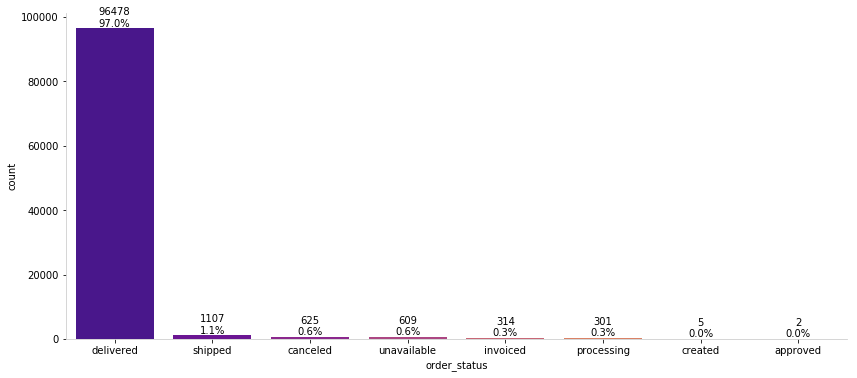

In [6]:
df_orders = olist_orders.merge(olist_customer, how='left', on='customer_id')
fig, ax = plt.subplots(figsize=(14, 6))
single_countplot(df_orders, x='order_status', ax=ax)
plt.show()

By the time this dataset was created, the highest amount of orders went from delivered ones. Only 3% of all orders came from the other status.

___
* _Is that a growing trend on e-commerce in Brazil? How can we describe a complete scenario?_
___

For the next plots, let's dive into the real evolution of e-commerce in terms of purchase orders. For this, we have to extract some info on the `order_purchase_timestamp` following the topics:

    1. Transform timestamp columns;
    2. Extract time attributes from these datetime columns (year, month, day, day of week and hour);
    3. Evaluate the e-commerce scenario using this attributes.

In [7]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Extracting attributes for purchase date - Year and Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

   order_purchase_year  order_purchase_month order_purchase_month_name  \
0                 2017                    10                       Oct   
1                 2018                     7                       Jul   
2                 2018                     8                       Aug   
3                 2017                    11                       Nov   
4                 2018                     2                       Feb   

  order_purchase_year_month order_purchase_date  order_purchase_day  \
0                    201710            20171002                   2   
1                    201807            20180724                  24   
2                    201808            20180808                   8   
3                    201711            20171118                  18   
4                    201802            20180213                  13   

   order_purchase_dayofweek order_purchase_dayofweek_name  \
0                         0                           Mon   
1                         1                           Tue   
2                         2                           Wed   
3                         5                           Sat   
4                         1                           Tue   

   order_purchase_hour order_purchase_time_day  
0                   10                 Morning  
1                   20                   Night  
2                    8                 Morning  
3                   19                   Night  
4                   21                   Night

So now we can purpose a complete analysis on orders amount of brazilian e-commerce during the period of the dataset. For that let's plot three graphs using a `GridSpec` with the aim answear the following questions:

    1. Is there any growing trend on brazilian e-commerce?
    2. On what day of week brazilians customers tend to do online purchasing?
    3. What time brazilians customers tend do buy (Dawn, Morning, Afternoon or Night)?

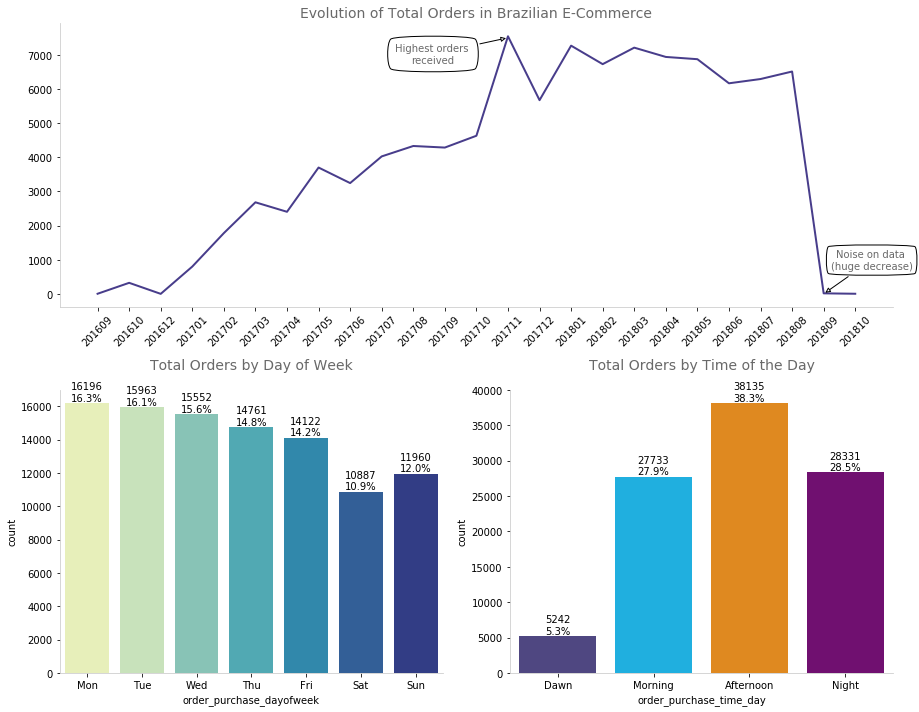

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
single_countplot(df_orders, x='order_purchase_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(df_orders, x='order_purchase_time_day', ax=ax3, order=False, palette=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

By the chart above we can conclude:

* E-commerce on Brazil really has a growing trend along the time. We can see some seasonality with peaks at specific months, but in general we can see clear that customers are more prone to buy things online than before.
* Monday are the prefered day for brazilian's customers and they tend to buy more at afternoons.

_Obs: we have a sharp decrease between August 2018 and September 2018 and maybe the origin of that is related to noise on data. For further comparison between 2017 and 2018, let's just consider orders between January and August in both years_

___
* _E-commerce: a comparison between 2017 and 2018_
___

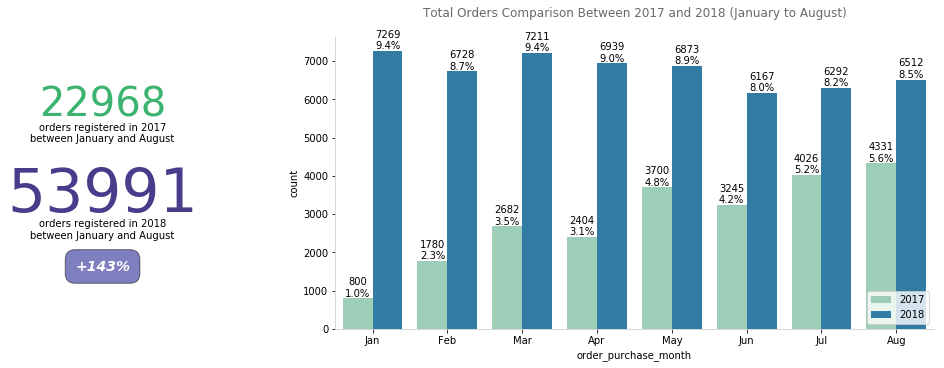

In [9]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on e-commerce orders between 2017 and 2018
df_orders_compare = df_orders.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = df_orders_compare['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax1.text(0.00, 0.73, f'{year_orders[2017]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.00, 0.64, 'orders registered in 2017\nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.00, 0.31, 'orders registered in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2018
single_countplot(df_orders_compare, x='order_purchase_month', hue='order_purchase_year', ax=ax2, order=False,
                 palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')
plt.show()

<a id="3.2"></a>
<font color="dimgrey" size=+2.0><b>3.2 E-Commerce Around Brazil</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

For preparing the data to a workaround analysis on brazilian's states e-commerce, we will take the following steps:

    1. Merge the orders data to order_items data;
    2. Use an API (brazilian government) to return the region of each customer_state;
    3. Purpose useful charts to answear business questions.

* Brazilian APIs ans links for geolocation info:

        https://servicodados.ibge.gov.br/api/docs/localidades?versao=1

Thanks to Andre Sionek that threated the geolocation lat and long on his kernel!

In [10]:
# Merging orders and order_items
df_orders_items = df_orders.merge(olist_order_items, how='left', on='order_id')

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = olist_geolocation[olist_geolocation.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

   order_purchase_year  order_purchase_month order_purchase_month_name  \
0                 2017                    10                       Oct   
1                 2018                     7                       Jul   
2                 2018                     8                       Aug   
3                 2017                    11                       Nov   
4                 2018                     2                       Feb   

  order_purchase_year_month order_purchase_date  order_purchase_day  \
0                    201710            20171002                   2   
1                    201807            20180724                  24   
2                    201808            20180808                   8   
3                    201711            20171118                  18   
4                    201802            20180213                  13   

   order_purchase_dayofweek order_purchase_dayofweek_name  \
0                         0                           Mon   
1                         1                           Tue   
2                         2                           Wed   
3                         5                           Sat   
4                         1                           Tue   

   order_purchase_hour order_purchase_time_day  order_item_id  \
0                   10                 Morning            1.0   
1                   20                   Night            1.0   
2                    8                 Morning            1.0   
3                   19                   Night            1.0   
4                   21                   Night            1.0   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b

___
* _An overview of customer's order by region, state and city_
___

In [11]:
# Filtering data between 201701 and 201808
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

# Grouping data by region
df_regions_group = df_orders_filt.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city (top 10)
df_cities_group = df_orders_filt.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

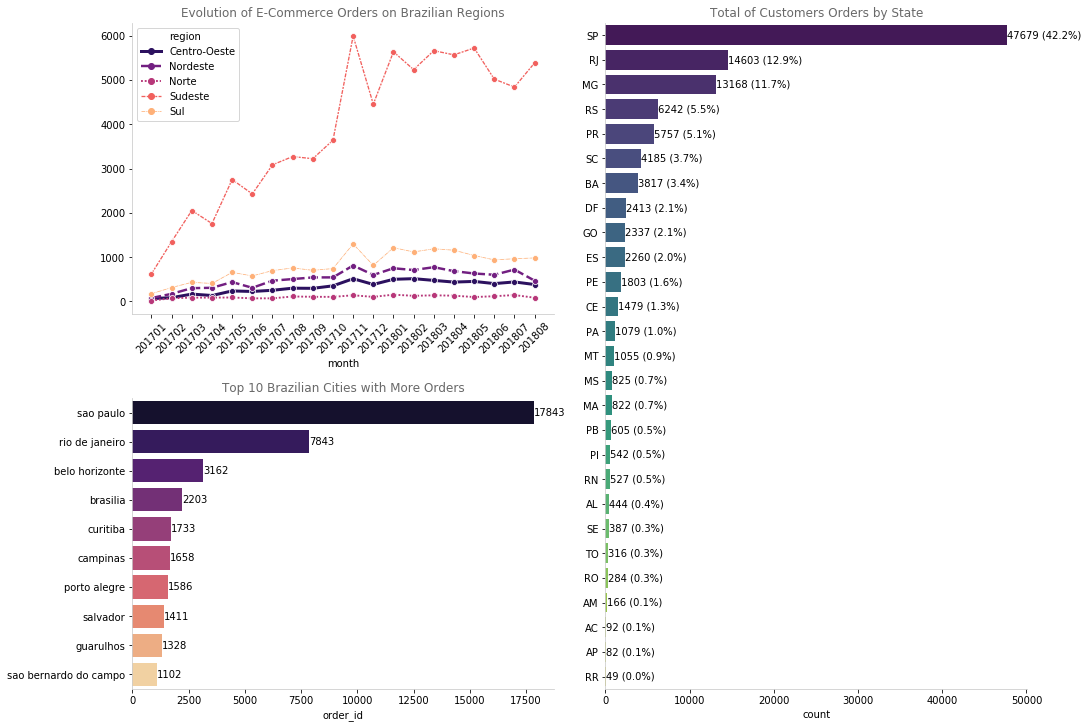

In [12]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# Count of orders by region
sns.lineplot(x='month', y='order_count', ax=ax1, data=df_regions_group, hue='region', 
             size='region', style='region', palette='magma', markers=['o'] * 5)
format_spines(ax1, right_border=False)
ax1.set_title('Evolution of E-Commerce Orders on Brazilian Regions', size=12, color='dimgrey')
ax1.set_ylabel('')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Top cities with more customers orders in Brazil
sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, ax=ax2, palette='magma')
AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax2)
format_spines(ax2, right_border=False)
ax2.set_title('Top 10 Brazilian Cities with More Orders', size=12, color='dimgrey')
ax2.set_ylabel('')

# Total orders by state
single_countplot(y='customer_state', ax=ax3, df=df_orders_filt, palette='viridis')
ax3.set_title('Total of Customers Orders by State', size=12, color='dimgrey')
ax3.set_ylabel('')

plt.show()

___
* _How customers are distributed in Brazil? (a 30k orders sample from 2018 in a map)_
___

In [13]:
# Zipping locations
lats = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lat'].dropna().values)[:30000]
longs = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lng'].dropna().values)[:30000]
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

___
* _**HeatMaps:** a good view to see where are the core of brazilian e-commerce customers_
___

By the map we showed above, we have already the insight that the southeast of Brazil has the highest number of orders given through e-commerce. So, let's see it in a HeatMap!

In [14]:
# Grouping geolocation data for plotting a heatmap
heat_data = df_orders_filt.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Mapa de Calor',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

map1

**Nice!** Another good view is to use the folium plugin _[HeatMapWithTime](https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/HeatMapWithTime.ipynb)_ to see the evolution of e-commerce orders among time.

For [limitations](https://github.com/python-visualization/folium/issues/859) purpose (i.e. jupyter and Chrome limitations for total number of points shown at HeatMapWithTime, we will show the evolution of orders from January 2018 to July 2018)

Also, it's possible that the plugin HeatMapWithTime doesn't work properly from a [issue](https://github.com/python-visualization/folium/issues/1221) fixed on version 0.11 (it's seems that the version of the kernel is 0.10). It it is the case for you, just updating the version of folium library would fix it.

In [15]:
epoch_list = []
heatmap_evl_data = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201801)]
heatmap_evl_data = heatmap_evl_data[(heatmap_evl_data['order_purchase_year_month'].astype(int) <= 201807)]
time_index = heatmap_evl_data['order_purchase_year_month'].sort_values().unique()
for epoch in time_index:
    data_temp = heatmap_evl_data.query('order_purchase_year_month == @epoch')
    data_temp = data_temp.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count()
    data_temp = data_temp.sort_values(by='order_id', ascending=False).iloc[:, :3]
    epoch_list.append(data_temp.values.tolist())
    
# Creating a mapa using folium
map2 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMapWithTime
HeatMapWithTime(
    name='Evolution of Orders in a Geolocation Perspective',
    data=epoch_list,
    radius=10,
    index=list(time_index)
).add_to(map2)

map2

<a id="3.3"></a>
<font color="dimgrey" size=+2.0><b>3.3 E-Commerce Impact on Economy</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Until now, we just answered questions on E-commerce scenario considering the number of orders received. We could see the volumetry amonth months, day of week, time of the day and even the geolocation states.

Now, we will analyze the money movemented by e-commerce by looking at order prices, freights and others.

___
* _How about the e-commerce sales? Did they grow up over time?_
___

For answear this question, let's first group our data in a way to look at the evolution overall.

In [16]:
# Grouping data
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

order_purchase_year order_purchase_year_month  order_id      price  \
0                 2017                    201701       966  120312.87   
1                 2017                    201702      1998  247303.02   
2                 2017                    201703      3041  374344.30   
3                 2017                    201704      2697  359927.23   
4                 2017                    201705      4176  506071.14   

   freight_value  price_per_order  freight_per_order  
0       16875.62       124.547484          17.469586  
1       38977.60       123.775285          19.508308  
2       57704.29       123.099079          18.975432  
3       52495.01       133.454664          19.464223  
4       80119.81       121.185618          19.185778

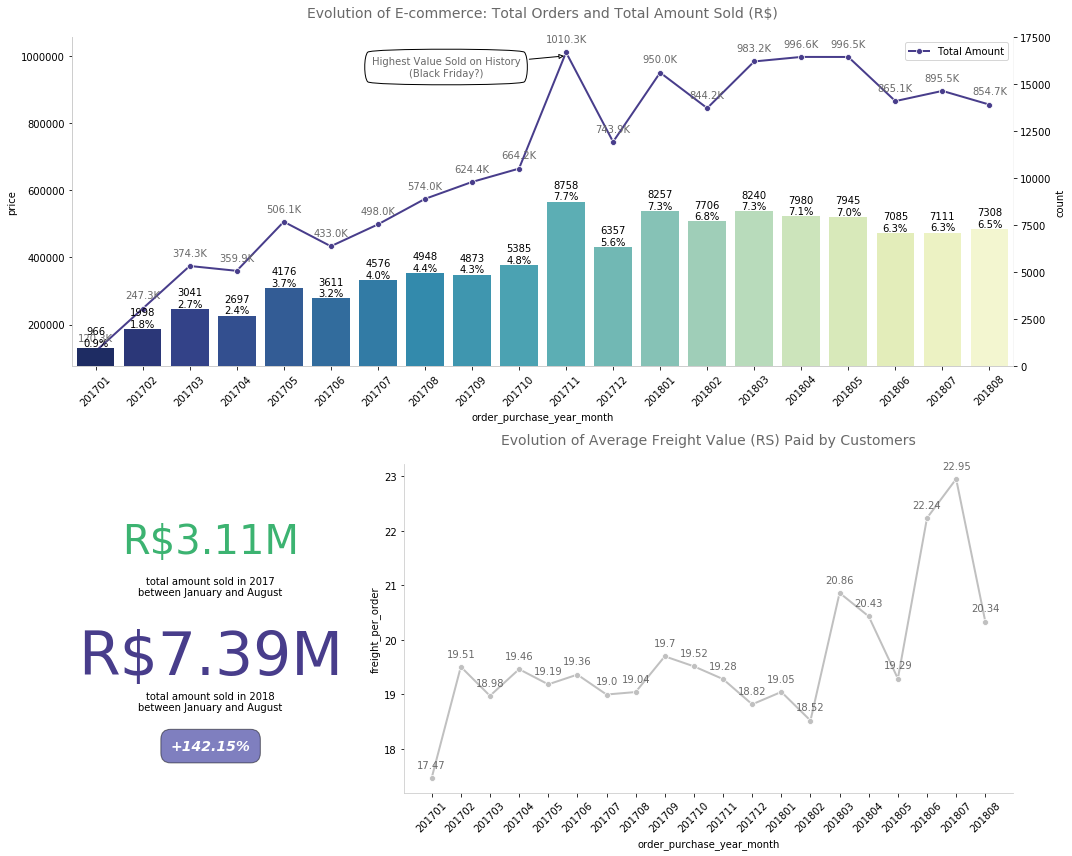

In [17]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:])

# Plot 1 - Evolution of total orders and total sales on e-commerce
sns.lineplot(x='order_purchase_year_month', y='price', ax=ax1, data=df_month_aggreg, linewidth=2, 
             color='darkslateblue', marker='o', label='Total Amount')
ax1_twx = ax1.twinx()
single_countplot(df_orders_filt, x='order_purchase_year_month', ax=ax1_twx, order=False, palette='YlGnBu_r')
ax1_twx.set_yticks(np.arange(0, 20000, 2500))

# Customizing the first plot
format_spines(ax1)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.price.items():
    ax1.annotate(str(round(y/1000, 1))+'K', xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax1.annotate(f'Highest Value Sold on History\n(Black Friday?)', (10, 1000000), xytext=(-120, -20), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.set_title('Evolution of E-commerce: Total Orders and Total Amount Sold (R$)', size=14, color='dimgrey', pad=20)

# Plot 2 - Big Numbers of Sales Evolution
month_comparison = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']
df_sales_compare = df_month_aggreg.query('order_purchase_year_month in (@month_comparison)')
sold_2017 = df_sales_compare.query('order_purchase_year == 2017')['price'].sum()
sold_2018 = df_sales_compare.query('order_purchase_year == 2018')['price'].sum()
growth = 1 + (sold_2017 / sold_2018)
ax2.text(0.50, 0.73, 'R$' + str(round(sold_2017/1000000, 2)) + 'M', fontsize=40, color='mediumseagreen', ha='center')
ax2.text(0.50, 0.60, 'total amount sold in 2017\nbetween January and August', fontsize=10, ha='center')
ax2.text(0.50, 0.36, 'R$' + str(round(sold_2018/1000000, 2)) + 'M', fontsize=60, color='darkslateblue', ha='center')
ax2.text(0.50, 0.25, 'total amount sold in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax2.text(0.50, 0.13, f'{signal}{str(round(100 * growth, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax2.axis('off')

# Plot 3 - Evolution of mean freight value paid by the customers
sns.lineplot(x='order_purchase_year_month', y='freight_per_order', data=df_month_aggreg, linewidth=2, 
             color='silver', marker='o', ax=ax3)
format_spines(ax3, right_border=False)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.freight_per_order.items():
    ax3.annotate(round(y, 2), xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax3.set_title('Evolution of Average Freight Value (RS) Paid by Customers', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

___
* _How the total sales (sum of price) are concentraded in brazilian states?_
___

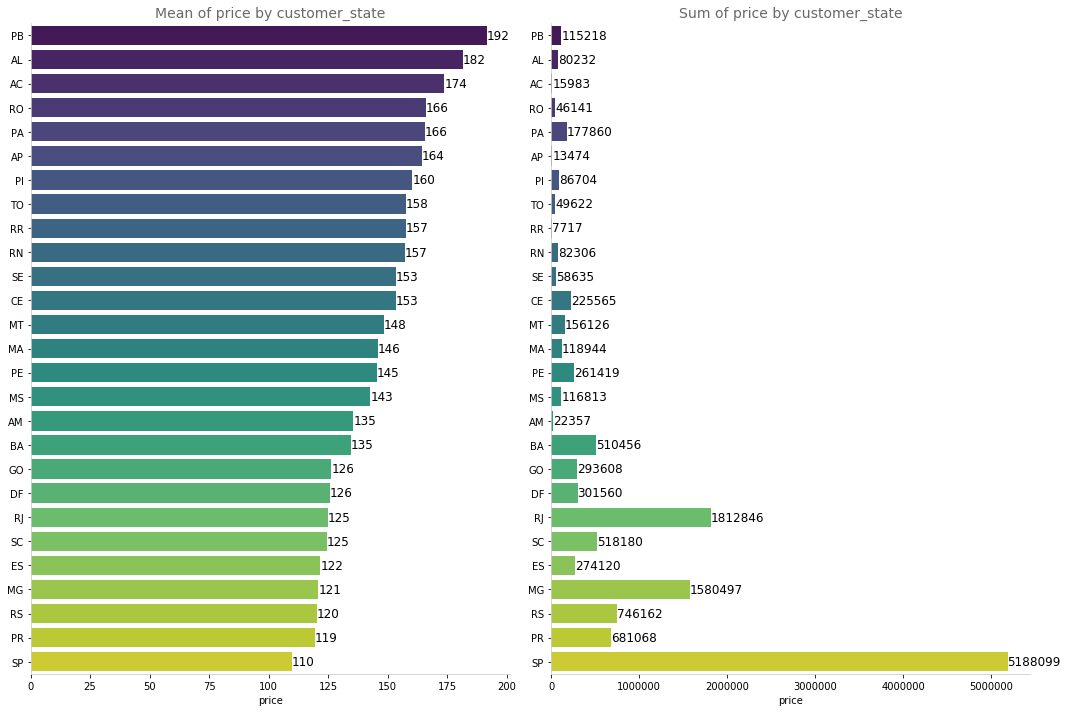

In [18]:
mean_sum_analysis(df_orders_filt, 'customer_state', 'price', palette='viridis', figsize=(15, 10))

It's very interesting to see how some states have a high total amount sold and a low price per order. If we look at SP (São Paulo) for example, it's possible to see that it is the state with most valuable state for e-commerce (5,188,099 sold) but it is also where customers pay less per order (110.00 per order).

How about the freight?

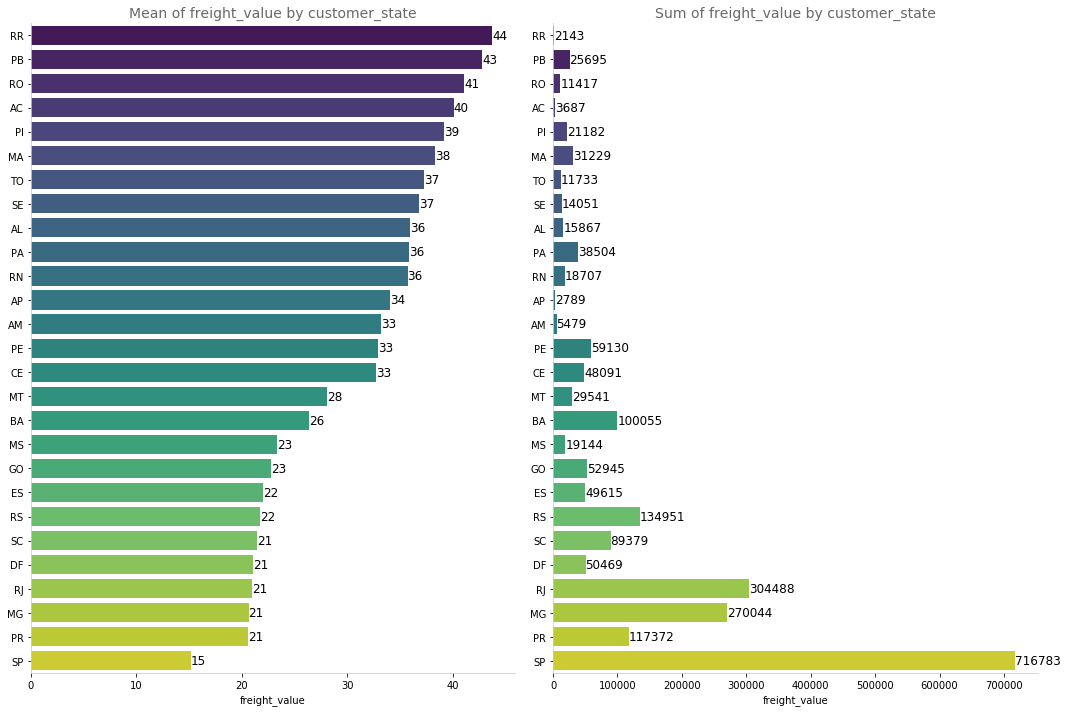

In [19]:
mean_sum_analysis(df_orders_filt, 'customer_state', 'freight_value', palette='viridis', figsize=(15, 10))

Here we can get insights about the customers states with highest mean freight value. For example, customers in Roraima (RR), Paraíba (PB), Rondônia (RO) and Acre (AC) normaly pays more than anyone on freights.

___
* _What are the best states to buy in Brazil? An analysis on sales, freight and delivery time_
___

In [20]:
# Calculating working days between purchasing, delivering and estimated delivery
purchasing = df_orders_filt['order_purchase_timestamp']
delivered = df_orders_filt['order_delivered_customer_date']
estimated = df_orders_filt['order_estimated_delivery_date']
df_orders_filt['time_to_delivery'] = calc_working_days(purchasing, delivered, convert=True)
df_orders_filt['diff_estimated_delivery'] = calc_working_days(estimated, delivered, convert=True)

# Grouping data by state
states_avg_grouped = df_orders_filt.groupby(by='customer_state', as_index=False).mean()
states_freight_paid = states_avg_grouped.loc[:, ['customer_state', 'freight_value']]
states_time_to_delivery = states_avg_grouped.loc[:, ['customer_state', 'time_to_delivery']]
states_estimated_delivery = states_avg_grouped.loc[:, ['customer_state', 'diff_estimated_delivery']]

# Sorting data
states_freight_paid = states_freight_paid.sort_values(by='freight_value', ascending=False)
states_time_to_delivery = states_time_to_delivery.sort_values(by='time_to_delivery', ascending=False)
states_estimated_delivery = states_estimated_delivery.sort_values(by='diff_estimated_delivery')

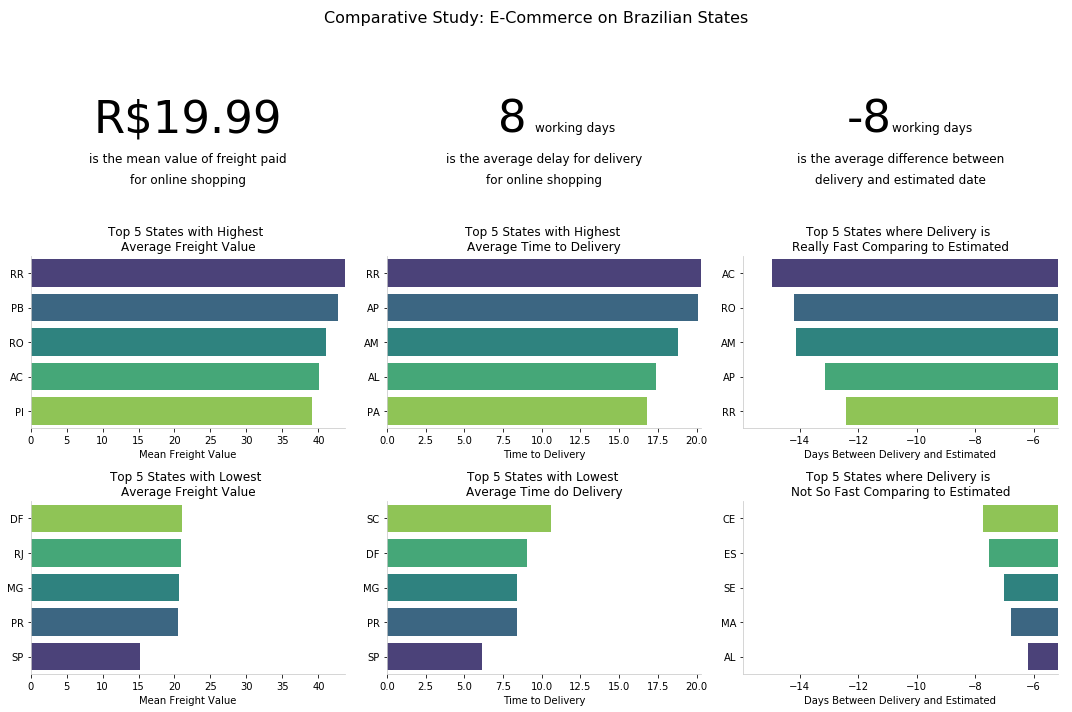

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Plot Pack 01 - Freight value paid on states
sns.barplot(x='freight_value', y='customer_state', data=states_freight_paid.head(), ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Top 5 States with Highest \nAverage Freight Value', size=12, color='black')
sns.barplot(x='freight_value', y='customer_state', data=states_freight_paid.tail(), ax=axs[2, 0], palette='viridis_r')
axs[2, 0].set_title('Top 5 States with Lowest \nAverage Freight Value', size=12, color='black')
for ax in axs[1, 0], axs[2, 0]:
    ax.set_xlabel('Mean Freight Value')
    ax.set_xlim(0, states_freight_paid['freight_value'].max())
    format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 0].text(0.50, 0.30, f'R${round(df_orders_filt.freight_value.mean(), 2)}', fontsize=45, ha='center')
axs[0, 0].text(0.50, 0.12, 'is the mean value of freight paid', fontsize=12, ha='center')
axs[0, 0].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 0].axis('off')

# Plot Pack 02 - Time to delivery on states
sns.barplot(x='time_to_delivery', y='customer_state', data=states_time_to_delivery.head(), ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Top 5 States with Highest \nAverage Time to Delivery', size=12, color='black')
sns.barplot(x='time_to_delivery', y='customer_state', data=states_time_to_delivery.tail(), ax=axs[2, 1], palette='viridis_r')
axs[2, 1].set_title('Top 5 States with Lowest \nAverage Time do Delivery', size=12, color='black')
for ax in axs[1, 1], axs[2, 1]:
    ax.set_xlabel('Time to Delivery')
    ax.set_xlim(0, states_time_to_delivery['time_to_delivery'].max())
    format_spines(ax, right_border=False)
    ax.set_ylabel('')
    
# Annotations
axs[0, 1].text(0.40, 0.30, f'{int(df_orders_filt.time_to_delivery.mean())}', fontsize=45, ha='center')
axs[0, 1].text(0.60, 0.30, 'working days', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.12, 'is the average delay for delivery', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 1].axis('off')
    
# Plot Pack 03 - Differnece between delivered and estimated on states
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=states_estimated_delivery.head(), ax=axs[1, 2], palette='viridis')
axs[1, 2].set_title('Top 5 States where Delivery is \nReally Fast Comparing to Estimated', size=12, color='black')
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=states_estimated_delivery.tail(), ax=axs[2, 2], palette='viridis_r')
axs[2, 2].set_title('Top 5 States where Delivery is \nNot So Fast Comparing to Estimated', size=12, color='black')
for ax in axs[1, 2], axs[2, 2]:
    ax.set_xlabel('Days Between Delivery and Estimated')
    ax.set_xlim(states_estimated_delivery['diff_estimated_delivery'].min()-1, 
                states_estimated_delivery['diff_estimated_delivery'].max()+1)
    format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 2].text(0.40, 0.30, f'{int(df_orders_filt.diff_estimated_delivery.mean())}', fontsize=45, ha='center')
axs[0, 2].text(0.60, 0.30, 'working days', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.12, 'is the average difference between', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.00, 'delivery and estimated date', fontsize=12, ha='center')
axs[0, 2].axis('off') 
    
plt.suptitle('Comparative Study: E-Commerce on Brazilian States', size=16)
plt.tight_layout()
plt.show()

<a id="3.4"></a>
<font color="dimgrey" size=+2.0><b>3.4 Payment Type Analysis</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

One of the datasets provided have informations about order's payment. To see how payments can take influence on e-commerce, we can build a mini-dashboard with main concepts: `payments type` and `payments installments`. The idea is to present enough information to clarify how e-commerce buyers usually prefer to pay orders.

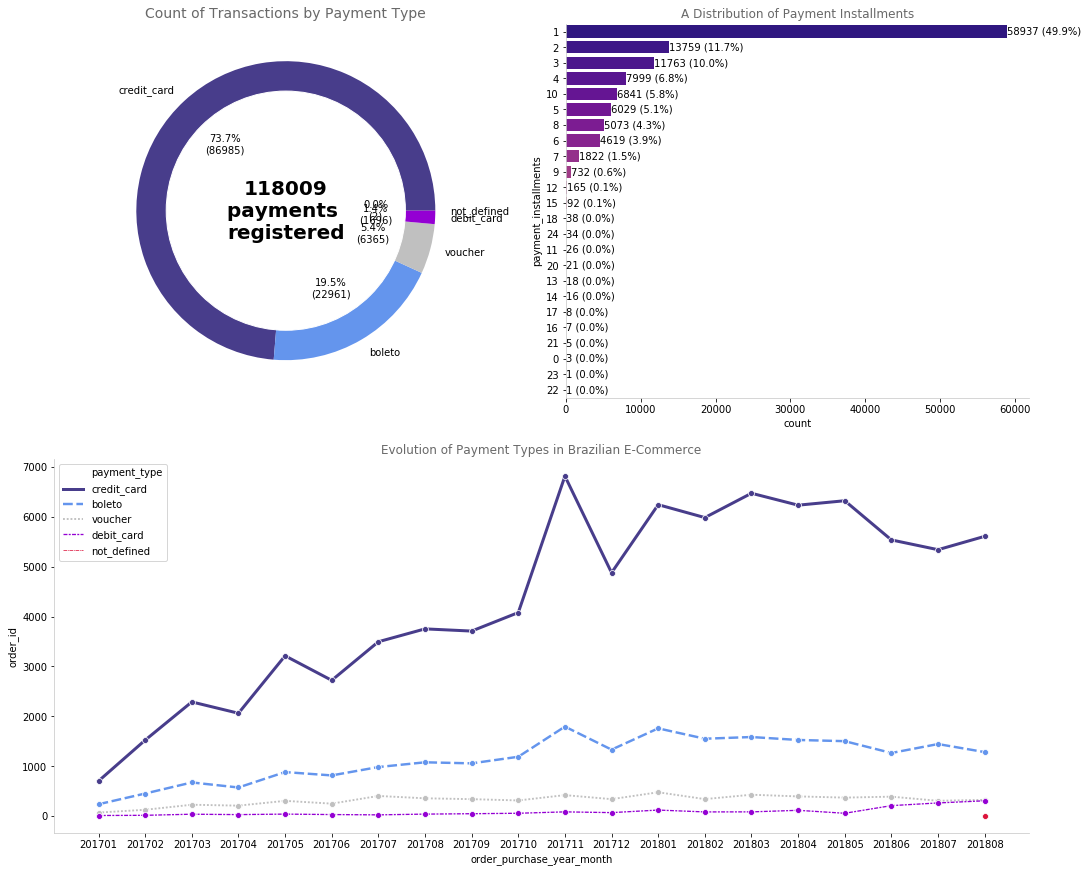

In [22]:
# Grouping data
df_orders_pay = df_orders_filt.merge(olist_order_payments, how='left', on='order_id')

# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plot 1 - Payment types in a donut chart
colors = ['darkslateblue', 'cornflowerblue', 'silver', 'darkviolet', 'crimson']
label_names = df_orders_pay['payment_type'].value_counts().index
donut_plot(df_orders_pay, col='payment_type', ax=ax1, label_names=label_names, colors=colors,
           title='Count of Transactions by Payment Type', text=f'{len(df_orders_pay)}\npayments \nregistered')

# Plot 2 - Payment installments
single_countplot(df_orders_pay, ax=ax2, y='payment_installments')
ax2.set_title('A Distribution of Payment Installments', color='dimgrey', size=12)

# Plot 3 - Evolution of payment types
payment_evl = df_orders_pay.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_evl = payment_evl.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_evl = payment_evl.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax3, hue='payment_type',
             style='payment_type', size='payment_type', palette=colors, marker='o')
format_spines(ax3, right_border=False)
ax3.set_title('Evolution of Payment Types in Brazilian E-Commerce', size=12, color='dimgrey')
plt.show()

In fact, we can see by the line chart that payments made by credit card really took marjority place on brazilian e-commerce. Besides that, since 201803 it's possible to see a little decrease on this type of payment. By the other side, payments made by debit card is showing a growing trend since 201805, wich is a good opportunity for investor to improve services for payments like this.

On the bar chart above, we can see how brazilian customers prefer to pay the orders: mostly of them pay once into 1 installment and it's worth to point out the quantity of payments done by 10 installments.

**Note: With this, we close our session for EDA and now we can start the Natural Language Process step on reviews! Keep in touch for more!**

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. Natural Language Processing</b></font>

As long as we could improve our relationship with the data, the path is open to start the Natural Language Processing step to analyze the comments left on e-commerce orders. The goal is to use this as input to a `sentimental analysis` model for understanding the customer's sentiment on purchasing things online. Let's take a look on the reviews data.

<a id="4.1"></a>
<font color="dimgrey" size=+2.0><b>4.1 Data Understanding</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [23]:
df_comments = olist_order_reviews.loc[:, ['review_score', 'review_comment_message']]
df_comments = df_comments.dropna(subset=['review_comment_message'])
df_comments = df_comments.reset_index(drop=True)
print(f'Dataset shape: {df_comments.shape}')
df_comments.columns = ['score', 'comment']
df_comments.head()

Dataset shape: (41753, 2)


score                                            comment
0      5              Recebi bem antes do prazo estipulado.
1      5  Parabéns lojas lannister adorei comprar pela I...
2      4  aparelho eficiente. no site a marca do aparelh...
3      4    Mas um pouco ,travando...pelo valor ta Boa.\r\n
4      5  Vendedor confiável, produto ok e entrega antes...

So, we have in hands approximately 41k comments that could be used for training a sentimental analysis model. But, for this to becoming true, we have to go trough a long way of text preparation to transform the comment input into a vector that can be interpreted for a Machine Learning model. **Let's go ahead**

<a id="4.2"></a>
<font color="dimgrey" size=+2.0><b>4.2 Regular Expressions</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

As long as we consider the global internet as the source of our comments, probably we have to deal with some HTML tags, break lines, special characteres and other content that could be part of the dataset. Let's dig a little bit more on `Regular Expressions` to search for those patterns.

First of all, let's define a function that will be used for analysing the results of an applied regular expression. With whis we can validate our text pre processing in an easier way.

In [24]:
def find_patterns(re_pattern, text_list):
    """
    Args:
    ---------
    re_pattern: regular expression pattern to be used on search [type: string]
    text_list: list with text strings [type: list]
    
    Returns:
    positions_dict: python dictionary with key-value pars as below:
        text_idx: [(start_pattern1, end_pattern1), (start_pattern1, end_pattern2), ... (start_n, end_n)]
    """
    
    # Compiling the Regular Expression passed as a arg
    p = re.compile(re_pattern)
    positions_dict = {}
    i = 0
    for c in text_list:
        match_list = []
        iterator = p.finditer(c)
        for match in iterator:
            match_list.append(match.span())
        control_key = f'Text idx {i}'
        if len(match_list) == 0:
            pass
        else:
            positions_dict[control_key] = match_list
        i += 1
        
    """p = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    pattern_dict = find_patterns(p, reviews_breakline)
    print(len(pattern_dict))
    pattern_dict
    for idx in [int(c.split(' ')[-1]) for c in list(pattern_dict.keys())]:
        print(f'{reviews_breakline[idx]}\n')"""

    return positions_dict

def print_step_result(text_list_before, text_list_after, idx_list):
    """
    Args:
    ----------
    text_list_before: list object with text content before transformation [type: list]
    text_list_after: list object with text content after transformation [type: list]
    idx_list: list object with indexes to be printed [type: list]
    """
    
    # Iterating over string examples
    i = 1
    for idx in idx_list:
        print(f'--- Text {i} ---\n')
        print(f'Before: \n{text_list_before[idx]}\n')
        print(f'After: \n{text_list_after[idx]}\n')
        i += 1

<a id="4.2.1"></a>
<font color="dimgrey" size=+1.5><b>4.2.1 Breakline and Carriage Return</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [25]:
def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

In [26]:
# Creating a list of comment reviews
reviews = list(df_comments['comment'].values)

# Applying RegEx
reviews_breakline = re_breakline(reviews)
df_comments['re_breakline'] = reviews_breakline

# Verifying results
print_step_result(reviews, reviews_breakline, idx_list=[48])

--- Text 1 ---

Before: 
Estava faltando apenas um produto, eu recebi hoje , muito obrigada!
Tudo certo!

Att 

Elenice.

After: 
Estava faltando apenas um produto, eu recebi hoje , muito obrigada!  Tudo certo!    Att     Elenice.



Here it's possible to see the tags \r (_carriage return_ code ASCII 10) and \n (_new line_ code ASCII 13). With RegEx, we could get rid of those patterns.

<a id="4.2.2"></a>
<font color="dimgrey" size=+1.5><b>4.2.2 Sites and Hiperlinks</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Another pattern that must be threated is sites and hiperlinks. Let's define another function to apply RegEx on this.

In [27]:
def re_hiperlinks(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

In [28]:
# Applying RegEx
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
df_comments['re_hiperlinks'] = reviews_hiperlinks

# Verifying results
print_step_result(reviews_breakline, reviews_hiperlinks, idx_list=[10796, 12782])

--- Text 1 ---

Before: 
comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/

After: 
comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto  link  quando o produto chegou aqui veio todos com a mesma cor, tabaco  link 

--- Text 2 ---

Before: 
Pedi esse: https://www.lannister.com.br/produto/22880118/botox-capilar-selafix-argan-premium-doux-clair-2x1-litro?pfm_carac=doux%20clair&pfm_index=3&pfm_page=search&pfm_pos=grid&pfm_type=search_page%

After: 
Pedi esse:  link 



<a id="4.2.3"></a>
<font color="dimgrey" size=+1.5><b>4.2.3 Dates</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Well, as long as we are dealing with customers reviews on items bought online, probably date mentions are very common. Let's see some examples and apply a RegEx to change this to `data` (means `date` in english).

In [29]:
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' data ', r) for r in text_list]

In [30]:
# Applying RegEx
reviews_dates = re_dates(reviews_hiperlinks)
df_comments['re_dates'] = reviews_dates

# Verifying results
print_step_result(reviews_hiperlinks, reviews_dates, idx_list=[26665, 41497, 41674])

--- Text 1 ---

Before: 
(tenso) tinhas mais de 10 lojas pra min escolher qual comprar, o pitei pela lannister por ser uma loja conhecida a entrega estava para dia 22/01/2018 . hoje já é 24/01/2018 pois comprei dia 06/01/18

After: 
(tenso) tinhas mais de 10 lojas pra min escolher qual comprar, o pitei pela lannister por ser uma loja conhecida a entrega estava para dia  data  . hoje já é  data  pois comprei dia  data 

--- Text 2 ---

Before: 
COMPREI EM 21/03/2018, PG VIA CARTÃO EM 21/03/2018, NF FOI EMITIDA DIA 27/03/2018, PREVISÃO ENTREGA EM 12/04/2018, HOJE É 14/04/2018, NÃO RECEBI, NÃO ESTÁ EM TRANSPORTE, ESTOU MUITO PREOCUPADO

After: 
COMPREI EM  data , PG VIA CARTÃO EM  data , NF FOI EMITIDA DIA  data , PREVISÃO ENTREGA EM  data , HOJE É  data , NÃO RECEBI, NÃO ESTÁ EM TRANSPORTE, ESTOU MUITO PREOCUPADO

--- Text 3 ---

Before: 
Já comprei várias vezes no site "lannister";mas  desta última vez,fiz uma compra de um TONER no  04.10.16 e só prometeram p/ 25.11.16 e ainda não  rece

<a id="4.2.4"></a>
<font color="dimgrey" size=+1.5><b>4.2.4 Money</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Another pattern that probably is very common on this kind of source is representations of money (R$ \__,\__). To improve our model, maybe it's a good idea to transform this pattern into a key word like `valor` (means `money` or `amount` in english).

In [31]:
def re_money(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]

In [32]:
# Applying RegEx
reviews_money = re_money(reviews_dates)
df_comments['re_money'] = reviews_money

# Verifying results
print_step_result(reviews_dates, reviews_money, idx_list=[26020, 33297, 32998])

--- Text 1 ---

Before: 
Recebi o produto correto, porém o valor do produto na NF ficou a menor, R$ 172,00 sendo que comprei a 219,90.  O valor do frete calculado foi R$ 18,90 e veio R$ 93,00.  Gostaria que viesse com correto

After: 
Recebi o produto correto, porém o valor do produto na NF ficou a menor,  dinheiro  sendo que comprei a 219,90.  O valor do frete calculado foi  dinheiro  e veio  dinheiro .  Gostaria que viesse com correto

--- Text 2 ---

Before: 
Infelizmente, para uma entrega em GRU (Região Metropolitana da Grande SP) achei bem "salgado" o valor do frete cobrado sobre o preço do produto! Afinal, a mercadoria custou R$26,70 + R$15,11 de frete!

After: 
Infelizmente, para uma entrega em GRU (Região Metropolitana da Grande SP) achei bem "salgado" o valor do frete cobrado sobre o preço do produto! Afinal, a mercadoria custou  dinheiro  +  dinheiro  de frete!

--- Text 3 ---

Before: 
Paguei $48,00 reais de frete e acabei tendo que buscar o pedido no Centro de Distribuição 

<a id="4.2.5"></a>
<font color="dimgrey" size=+1.5><b>4.2.5 Numbers</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Here we will try to find numbers on reviews and replace them with another string `numero` (that means `number`, in english). We could just replace the numbers with whitespace but maybe this would generated some information loss. Let's see what we've got:

In [33]:
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]

In [34]:
# Applying RegEx
reviews_numbers = re_numbers(reviews_money)
df_comments['re_numbers'] = reviews_numbers

# Verifying results
print_step_result(reviews_money, reviews_numbers, idx_list=[68])

--- Text 1 ---

Before: 
Comprei o produto dia 25 de fevereiro e hoje dia 29 de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.

After: 
Comprei o produto dia  numero  de fevereiro e hoje dia  numero  de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.



<a id="4.2.6"></a>
<font color="dimgrey" size=+1.5><b>4.2.6 Negation</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

This session was thought and discussed in a special way. The problem statement is that when we remove the stopwords, probabily we would loose the meaning of some phrases about removing the negation words like `não` (not), for example. So, because of this, maybe is a good idea to replace some negation words with some common words indicating a negation meaning.

In [35]:
def re_negation(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', r) for r in text_list]

In [36]:
# Applying RegEx
reviews_negation = re_negation(reviews_numbers)
df_comments['re_negation'] = reviews_negation

# Verifying results
print_step_result(reviews_numbers, reviews_negation, idx_list=[4783, 4627, 4856, 4904])

--- Text 1 ---

Before: 
O material é bom, o problema é que a bolsa não fecha, não possui zíper, é como uma sacola. Isso me deixou insatisfeita, pois na foto não dá pra perceber e não há informação ou foto interna sobre isso.

After: 
O material é bom, o problema é que a bolsa  negação  fecha,  negação  possui zíper, é como uma sacola. Isso me deixou insatisfeita, pois na foto  negação  dá pra perceber e  negação  há informação ou foto interna sobre isso.

--- Text 2 ---

Before: 
Meu pedido era para ser entregue até dia  data , até a presente data ( numero / numero ) a nota fiscal não foi emitida, solicitei várias vezes não obtive retorno, não recomendo esta Loja, nem a lannister!!!!!!

After: 
Meu pedido era para ser entregue até dia  data , até a presente data ( numero / numero ) a nota fiscal  negação  foi emitida, solicitei várias vezes  negação  obtive retorno,  negação  recomendo esta Loja, nem a lannister!!!!!!

--- Text 3 ---

Before: 
OEQUIPAMENTO NÃO FUNCIONA. O mini cartao 

<a id="4.2.7"></a>
<font color="dimgrey" size=+1.5><b>4.2.7 Special Characters</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The search for special characteres is a really special one because we see a lot of this pattern on online comments. Let's build an RegEx motor to find those ones.

In [37]:
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('\W', ' ', r) for r in text_list]

In [38]:
# Applying RegEx
reviews_special_chars = re_special_chars(reviews_negation)
df_comments['re_special_chars'] = reviews_special_chars

# Verifying results
print_step_result(reviews_negation, reviews_special_chars, idx_list=[45, 135, 234])

--- Text 1 ---

Before: 
Este foi o pedido  Balde Com  numero  Peças - Blocos De Montar  numero  un -  dinheiro  cada ( negação  FOI ENTREGUE)  Vendido e entregue targaryen  Tapete de Eva Nº Letras  numero  Peças Crianças  numero  un -  dinheiro  (ESTE FOI ENTREG

After: 
Este foi o pedido  Balde Com  numero  Peças   Blocos De Montar  numero  un    dinheiro  cada   negação  FOI ENTREGUE   Vendido e entregue targaryen  Tapete de Eva Nº Letras  numero  Peças Crianças  numero  un    dinheiro   ESTE FOI ENTREG

--- Text 2 ---

Before: 
Cada vez que compro mais fico satisfeita parabéns pela honestidade com seus clientes 👏👏👏👏?

After: 
Cada vez que compro mais fico satisfeita parabéns pela honestidade com seus clientes      

--- Text 3 ---

Before: 
Comprei o produto, paguei no boleto e só recebi metade do produto, anunciaram uma coisa é mandaram outra. Muito insatisfeita 😡😡😡

After: 
Comprei o produto  paguei no boleto e só recebi metade do produto  anunciaram uma coisa é mandaram outra  M

<a id="4.2.8"></a>
<font color="dimgrey" size=+1.5><b>4.2.8 Additional Whitespaces</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After all the steps we have taken over here, it's important to clean our text eliminating unecessary whitespaces. Let's apply a RegEx for this and see what we've got.

In [39]:
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

In [40]:
# Applying RegEx
reviews_whitespaces = re_whitespaces(reviews_special_chars)
df_comments['re_whitespaces'] = reviews_whitespaces

# Verifying results
print_step_result(reviews_special_chars, reviews_whitespaces, idx_list=[3, 4, -1])

--- Text 1 ---

Before: 
Mas um pouco  travando   pelo valor ta Boa   

After: 
Mas um pouco travando pelo valor ta Boa

--- Text 2 ---

Before: 
Vendedor confiável  produto ok e entrega antes do prazo 

After: 
Vendedor confiável produto ok e entrega antes do prazo

--- Text 3 ---

Before: 
meu produto chegou e ja tenho que devolver  pois está com defeito    negação  segurar carga

After: 
meu produto chegou e ja tenho que devolver pois está com defeito negação segurar carga



<a id="4.3"></a>
<font color="dimgrey" size=+2.0><b>4.3 Stopwords</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Well, by now we have a text dataset without any pattern that we threated with RegEx and also without punctuations. In other words, we have a half-clean text with a rich transformation applied. 

So, we are ready to apply some advanced text transformations like `stopwords` removal, `stemming` and the `TF-IDF` matrix process. Let's start with portuguese stopwords.

In [41]:
# Examples of some portuguese stopwords
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 204


['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [42]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('portuguese')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [43]:
# Removing stopwords and looking at some examples
reviews_stopwords = [' '.join(stopwords_removal(review)) for review in reviews_whitespaces]
df_comments['stopwords_removed'] = reviews_stopwords

print_step_result(reviews_whitespaces, reviews_stopwords, idx_list=[0, 45, 500])

--- Text 1 ---

Before: 
Recebi bem antes do prazo estipulado

After: 
recebi bem antes prazo estipulado

--- Text 2 ---

Before: 
Este foi o pedido Balde Com numero Peças Blocos De Montar numero un dinheiro cada negação FOI ENTREGUE Vendido e entregue targaryen Tapete de Eva Nº Letras numero Peças Crianças numero un dinheiro ESTE FOI ENTREG

After: 
pedido balde numero peças blocos montar numero un dinheiro cada negação entregue vendido entregue targaryen tapete eva nº letras numero peças crianças numero un dinheiro entreg

--- Text 3 ---

Before: 
O produto negação é bom

After: 
produto negação bom



<a id="4.4"></a>
<font color="dimgrey" size=+2.0><b>4.4 Stemming</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Let's define a function to apply the stemming process on the comments. We will also give examples of the results.

In [44]:
# Defining a function to remove the stopwords and to lower the comments
def stemming_process(text, stemmer=RSLPStemmer()):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    stemmer: type of stemmer to be applied [type: class, default: RSLPStemmer()]
    """
    
    return [stemmer.stem(c) for c in text.split()]

In [45]:
# Applying stemming and looking at some examples
reviews_stemmer = [' '.join(stemming_process(review)) for review in reviews_stopwords]
df_comments['stemming'] = reviews_stemmer

print_step_result(reviews_stopwords, reviews_stemmer, idx_list=[0, 45, -1])

--- Text 1 ---

Before: 
recebi bem antes prazo estipulado

After: 
receb bem ant praz estipul

--- Text 2 ---

Before: 
pedido balde numero peças blocos montar numero un dinheiro cada negação entregue vendido entregue targaryen tapete eva nº letras numero peças crianças numero un dinheiro entreg

After: 
ped bald numer peç bloc mont numer un dinh cad neg entreg vend entreg targaryen tapet eva nº letr numer peç crianç numer un dinh entreg

--- Text 3 ---

Before: 
produto chegou ja devolver pois defeito negação segurar carga

After: 
produt cheg ja devolv poi defeit neg segur carg



<a id="4.5"></a>
<font color="dimgrey" size=+2.0><b>4.5 Feature Extraction</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Well, once we have passe through RegEx, stopwords removal and stemming application, to give more meaning for the text we are analysing, we can use approachs like _Bag of Words_, _TF-IDF_ and _Word2Vec_. For make our analysis easier, let's define a function that receives a text and a `vectorizer` object and applies the feature extraction on the respective text.

In [46]:
def extract_features_from_corpus(corpus, vectorizer, df=False):
    """
    Args
    ------------
    text: text to be transformed into a document-term matrix [type: string]
    vectorizer: engine to be used in the transformation [type: object]
    """
    
    # Extracting features
    corpus_features = vectorizer.fit_transform(corpus).toarray()
    features_names = vectorizer.get_feature_names()
    
    # Transforming into a dataframe to give interpetability to the process
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)
    
    return corpus_features, df_corpus_features

<a id="4.5.1"></a>
<font color="dimgrey" size=+1.5><b>4.5.1 CountVectorizer</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

On the _Bag of Words_ approach, we create a dicitonary vocabulary with all the unique words and, for each word in each comment/text string, we index the words into a vector that represents the occurence (1) or not (0) of each word. This is a way for transforming a text into a frequency vector considering a literal bag of words (dictionary vocabulary).

In [47]:
# Creating an object for the CountVectorizer class
count_vectorizer = CountVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Extracting features for the corpus
countv_features, df_countv_features = extract_features_from_corpus(reviews_stemmer, count_vectorizer, df=True)
print(f'Shape of countv_features matrix: {countv_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_countv_features.head()

Shape of countv_features matrix: (41753, 300)

Example of DataFrame of corpus features:


abr  acab  ach  acontec  acord  ador  adquir  agor  aguard  aind  algum  \
0    0     0    0        0      0     0       0     0       0     0      0   
1    0     0    0        0      0     1       0     0       0     0      0   
2    0     0    0        0      0     0       0     0       0     0      0   
3    0     0    0        0      0     0       0     0       0     0      0   
4    0     0    0        0      0     0       0     0       0     0      0   

   além  amass  ame  ant  anunci  anúnci  apen  apes  após  assim  ate  atend  \
0     0      0    0    1       0       0     0     0     0      0    0      0   
1     0      0    0    0       0       0     0     0     0      0    0      0   
2     0      0    0    0       0       0     0     0     0      0    0      0   
3     0      0    0    0       0       0     0     0     0      0    0      0   
4     0      0    0    1       0       0     0     0     0      0    0      0   

   atras  avali  avis  baix  baratheon  bast  bem  boa  bols  bom  bonit  \
0      0      0     0     0          0     0    1    0     0    0      0   
1      0      0     0     0          0     0    0    0     0    0      0   
2      0      0     0     0          0     0    0    0     0    0      0   
3      0      0     0     0          0     0    0    1     0    0      0   
4      0      0     0     0          0     0    0    0     0    0      0   

   busc  cab  cad  cade  caix  cancel  cap  car  cart  cartuch  cas  celul  \
0     0    0    0     0     0       0    0    0     0        0    0      0   
1     0    0    0     0     0       0    0    0     0        0    0      0   
2     0    0    0     0     0       0    0    0     0        0    0      0   
3     0    0    0     0     0       0    0    0     0        0    0      0   
4     0    0    0     0     0       0    0    0     0        0    0      0   

   cert  cheg  client  cobr  ...  satisf  satisfeit  segund  sei  seman  \
0     0     0       0     0  ...       0          0       0    0      0   
1     0     0       0     0  ...       0          0       0    0      0   
2     0     1       0     0  ...       0          0       0    0      0   
3     0     0       0     0  ...       0          0       0    0      0   
4     0     0       0     0  ...       0          0       0    0      0   

   sempr  send  ser  serviç  sid  sim  sit  so  sobr  solicit  solt  soment  \
0      0     0    0       0    0    0    0   0     0        0     0       0   
1      0     0    0       0    0    0    0   0     0        0     0       0   
2      0     0    0       0    0    0    1   0     0        0     0       0   
3      0     0    0       0    0    0    0   0     0        0     0       0   
4      0     0    0       0    0    0    0   0     0        0     0       0   

   stark  sup  super  tamanh  tapet  targaryen  tec  temp  tent  ter  test  \
0      0    0      0       0      0          0    0     0     0    0     0   
1      0    0      0       0      0          0    0     0     0    0     0   
2      0    0      0       0      0          0    0     0     0    0     0   
3      0    0      0       0      0          0    0     0     0    0     0   
4      0    0      0       0      0          0    0     0     0    0     0   

   tod  total  trabalh  transport  troc  tud  unidad  us  uso  vai  val  vc  \
0    0      0        0          0     0    0       0   0    0    0    0   0   
1    1      0        0          0     0    0       0   0    0    0    0   0   
2    0      0        0          0     0    0       0   0    0    0    0   0   
3    0      0        0          0     0    0       0   0    0    0    1   0   
4    0      0        0          0     0    0       0   0    0    0    0   0   

   vei  vem  vend  ver  vez  vier  volt  vou  ótim  únic  
0    0    0     0    0    0     0     0    0     0     0  
1    0    0     0    0    0     0     0    0     0     0  
2    0    0     0    0    1     0     0    0     0     0  
3    0    0    

<a id="4.5.2"></a>
<font color="dimgrey" size=+1.5><b>4.5.2 TF-IDF</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

With the _Bag of Words_ approach, each words has the same weight, wich maybe can't be true all the time, mainly for those words with a really low frequency on the corpus. So, the _TF-IDF (Term Frequency and Inverse Document Frequency)_ approach can be used with the scikit-learn library following the formulas:

$$TF=\frac{\text{Frequency of a word in the document}}{\text{Total words in the document}}$$

$$IDF = \log\left({\frac{\text{Total number of docs}}{\text{Number of docs containing the words}}}\right)$$

In [48]:
# Creating an object for the CountVectorizer class
tfidf_vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Extracting features for the corpus
tfidf_features, df_tfidf_features = extract_features_from_corpus(reviews_stemmer, tfidf_vectorizer, df=True)
print(f'Shape of tfidf_features matrix: {tfidf_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_tfidf_features.head()

Shape of tfidf_features matrix: (41753, 300)

Example of DataFrame of corpus features:


abr  acab  ach  acontec  acord      ador  adquir  agor  aguard  aind  \
0  0.0   0.0  0.0      0.0    0.0  0.000000     0.0   0.0     0.0   0.0   
1  0.0   0.0  0.0      0.0    0.0  0.320276     0.0   0.0     0.0   0.0   
2  0.0   0.0  0.0      0.0    0.0  0.000000     0.0   0.0     0.0   0.0   
3  0.0   0.0  0.0      0.0    0.0  0.000000     0.0   0.0     0.0   0.0   
4  0.0   0.0  0.0      0.0    0.0  0.000000     0.0   0.0     0.0   0.0   

   algum  além  amass  ame       ant  anunci  anúnci  apen  apes  após  assim  \
0    0.0   0.0    0.0  0.0  0.351981     0.0     0.0   0.0   0.0   0.0    0.0   
1    0.0   0.0    0.0  0.0  0.000000     0.0     0.0   0.0   0.0   0.0    0.0   
2    0.0   0.0    0.0  0.0  0.000000     0.0     0.0   0.0   0.0   0.0    0.0   
3    0.0   0.0    0.0  0.0  0.000000     0.0     0.0   0.0   0.0   0.0    0.0   
4    0.0   0.0    0.0  0.0  0.284558     0.0     0.0   0.0   0.0   0.0    0.0   

   ate  atend  atras  avali  avis  baix  baratheon  bast       bem       boa  \
0  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0  0.427963  0.000000   
1  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0  0.000000  0.000000   
2  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0  0.000000  0.000000   
3  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0  0.000000  0.511137   
4  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0  0.000000  0.000000   

   bols  bom  bonit  busc  cab  cad  cade  caix  cancel  cap  car  cart  \
0   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   
1   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   
2   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   
3   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   
4   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   

   cartuch  cas  celul  cert      cheg  client  cobr  ...  satisf  satisfeit  \
0      0.0  0.0    0.0   0.0  0.000000     0.0   0.0  ...     0.0        0.0   
1      0.0  0.0    0.0   0.0  0.000000     0.0   0.0  ...     0.0        0.0   
2      0.0  0.0    0.0   0.0  0.168564     0.0   0.0  ...     0.0        0.0   
3      0.0  0.0    0.0   0.0  0.000000     0.0   0.0  ...     0.0        0.0   
4      0.0  0.0    0.0   0.0  0.000000     0.0   0.0  ...     0.0        0.0   

   segund  sei  seman  sempr  send  ser  serviç  sid  sim       sit   so  \
0     0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  0.000000  0.0   
1     0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  0.000000  0.0   
2     0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  0.264843  0.0   
3     0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  0.000000  0.0   
4     0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  0.000000  0.0   

   sobr  solicit  solt  soment  stark  sup  super  tamanh  tapet  targaryen  \
0   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0    0.0        0.0   
1   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0    0.0        0.0   
2   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0    0.0        0.0   
3   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0    0.0        0.0   
4   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0    0.0        0.0   

   tec  temp  tent  ter  test       tod  total  trabalh  transport  troc  tud  \
0  0.0   0.0   0.0  0.0   0.0  0.000000    0.0      0.0        0.0   0.0  0.0   
1  0.0   0.0   0.0  0.0   0.0  0.312579    0.0      0.0        0.0   0.0  0.0   
2  0.0   0.0   0.0  0.0   0.0  0.000000    0.0      0.0        0.0   0.0  0.0   
3  0.0   0.0   0.0  0.0   0.0  0.000000    0.0      0.0        0.0   0.0  0.0   
4  0.0   0.0   0.0  0.0   0.0  0.000000    0.0      0.0        0.0   0.0  0.0   

   unidad   us  uso  vai       val   vc  vei  vem      vend  ver       vez  \
0     0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   
1     0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   

The attributes used during the instancing of each vectorizer objects can be explained as:

- `max_features=300`: indicates that the matrix will be created using the 300 most common words from the corpus
- `max_df=0.8`: indicates that we will use only words with at least 80% frequency in the corpus
- `min_df=7`: indicates that we will use only words that occurs in at least 7 text strings in the corpus

<a id="4.6"></a>
<font color="dimgrey" size=+2.0><b>4.6 Labelling Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

For training a sentimental analysis model, we must need the label to apply in a supervisioned Machine Learning approach. The dataset we doesn't have a clearly label saying wich comment is positive or negative. For doing that, probably the best approach is to look at individual comments and label it handly with 1 (positive comment) and 0 (negative comment) but, thinking in a fast implementation, we will use the `review_score` column to label our data into those two classes. Let's take a look.

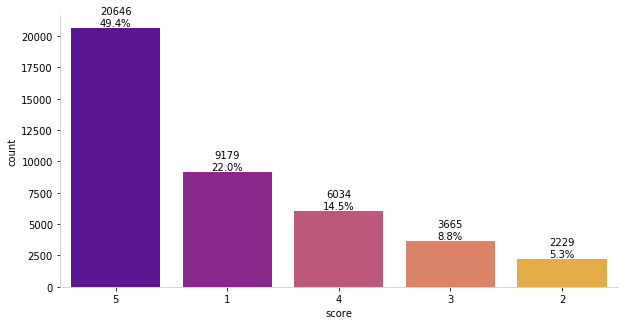

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
single_countplot(x='score', df=df_comments, ax=ax)

In this approach, let's consider that every comment with scores 1, 2 and 3 are negative comments. In the other hand, comments with score 4 and 5 will be considered as positive. Again, probably this is not the best way to train a sentimental analysis model, but for fastness, we will do this assumption and see if we can extract value from it.

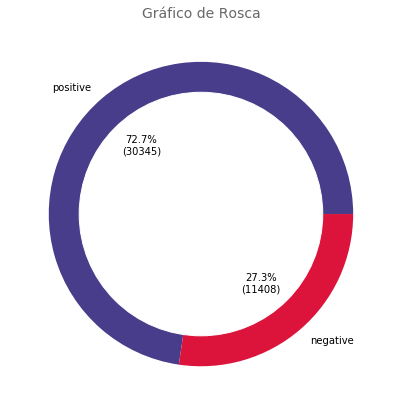

In [50]:
# Labelling data
score_map = {
    1: 'negative',
    2: 'negative',
    3: 'positive',
    4: 'positive',
    5: 'positive'
}
df_comments['sentiment_label'] = df_comments['score'].map(score_map)

# Verifying results
fig, ax = plt.subplots(figsize=(7, 7))
donut_plot(df_comments.query('sentiment_label in ("positive", "negative")'), 'sentiment_label', 
           label_names=df_comments.query('sentiment_label in ("positive", "negative")')['sentiment_label'].value_counts().index,
           ax=ax, colors=['darkslateblue', 'crimson'])

___
* _What's the main n-grams presentes in corpus on positive and negative classes?_
___

I want to give credits to Raenish David notebook [Tweet Sentiment - Insight EDA](https://www.kaggle.com/raenish/tweet-sentiment-insight-eda) that inspired this analysis.

In [51]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('portuguese')):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [52]:
# Splitting the corpus into positive and negative comments
positive_comments = df_comments.query('sentiment_label == "positive"')['stemming']
negative_comments = df_comments.query('sentiment_label == "negative"')['stemming']

# Extracting the top 10 unigrams by sentiment
unigrams_pos = ngrams_count(positive_comments, (1, 1), 10)
unigrams_neg = ngrams_count(negative_comments, (1, 1), 10)

# Extracting the top 10 unigrams by sentiment
bigrams_pos = ngrams_count(positive_comments, (2, 2), 10)
bigrams_neg = ngrams_count(negative_comments, (2, 2), 10)

# Extracting the top 10 unigrams by sentiment
trigrams_pos = ngrams_count(positive_comments, (3, 3), 10)
trigrams_neg = ngrams_count(negative_comments, (3, 3), 10)

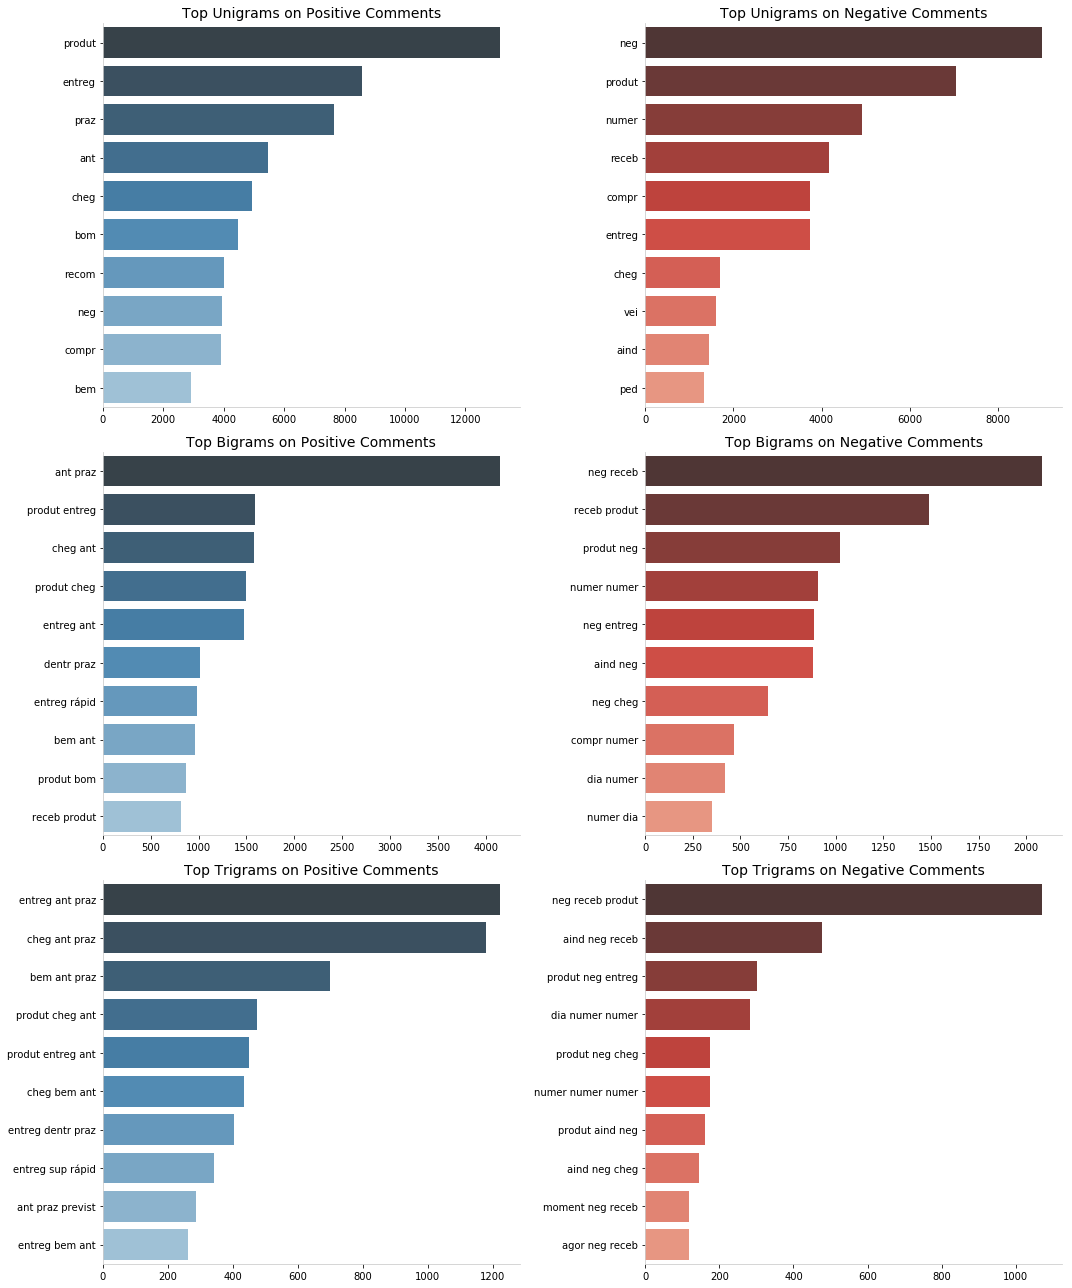

In [53]:
# Joining everything in a python dictionary to make the plots easier
ngram_dict_plot = {
    'Top Unigrams on Positive Comments': unigrams_pos,
    'Top Unigrams on Negative Comments': unigrams_neg,
    'Top Bigrams on Positive Comments': bigrams_pos,
    'Top Bigrams on Negative Comments': bigrams_neg,
    'Top Trigrams on Positive Comments': trigrams_pos,
    'Top Trigrams on Negative Comments': trigrams_neg,
}

# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Blues_d', 'Reds_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Customizing plots
    format_spines(ax, right_border=False)
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Incrementing the index
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.show()

The barcharts above are interesting and they really reflect the sentiment based on ngrams. We can clearly see negative words on bigrams and trigrams by the right side of the figure (the most frequent trigram `neg receb produt` in english maybe means something like `didn't receive the product` for example).

The positive bigrams and trigrams at the blue left side of the figure really consists of positive words (the most frequent trigram `entreg ant praz` means something like `delivery before time` in english). Also!

<a id="4.7"></a>
<font color="dimgrey" size=+2.0><b>4.7 Pipeline</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

So, after detailing all the steps considered on this text prep pipeline, let's build a code to apply a complete pipeline automatically to handle it. This is a important step on the project because with this we can receive a text input and apply all changes on it to make it ready for training or predicting the sentiment label.

In [54]:
# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):
    
    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)
            
        return X

# Class for stopwords removal from the corpus
class StopWordsRemoval(BaseEstimator, TransformerMixin):
    
    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [' '.join(stopwords_removal(comment, self.text_stopwords)) for comment in X]

# Class for apply the stemming process
class StemmingProcess(BaseEstimator, TransformerMixin):
    
    def __init__(self, stemmer):
        self.stemmer = stemmer
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [' '.join(stemming_process(comment, self.stemmer)) for comment in X]
    
# Class for extracting features from corpus
class TextFeatureExtraction(BaseEstimator, TransformerMixin):
    
    def __init__(self, vectorizer):
        self.vectorizer = vectorizer
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return self.vectorizer.fit_transform(X).toarray()

In [55]:
# Defining regex transformers to be applied
regex_transformers = {
    'break_line': re_breakline,
    'hiperlinks': re_hiperlinks,
    'dates': re_dates,
    'money': re_money,
    'numbers': re_numbers,
    'negation': re_negation,
    'special_chars': re_special_chars,
    'whitespaces': re_whitespaces
}

# Defining the vectorizer to extract features from text
vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Building the Pipeline
text_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
    ('stemming', StemmingProcess(RSLPStemmer())),
    ('text_features', TextFeatureExtraction(vectorizer))
])

Just to remember, in the pipeline above we chose the TF-IDF approach to extract features from text using the same parameters we used on the examples (`max_features=300`, `min_df=7`, `max_df=0.8`). It means that every text string in our corpus will be 300 "text features" respecting the criteria defined by the min_df and max_df parameters. Let's apply it.

In [56]:
# Defining X and y 
idx_reviews = olist_order_reviews['review_comment_message'].dropna().index
score = olist_order_reviews['review_score'][idx_reviews].map(score_map)

# Splitting into train and test sets
X = list(olist_order_reviews['review_comment_message'][idx_reviews].values)
y = score.apply(lambda x: 1 if x == 'positive' else 0).values

# Applying the pipeline and splitting the data
X_processed = text_pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=.20, random_state=42)

# Verifying results
print(f'Length of X_train_processed: {len(X_train)} - Length of one element: {len(X_train[0])}')
print(f'Length of X_test_processed: {len(X_test)} - Length of one element: {len(X_test[0])}')

Length of X_train_processed: 33402 - Length of one element: 300
Length of X_test_processed: 8351 - Length of one element: 300


<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5. Sentiment Classification</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Well, we went trought a lot of steps together and this is the final one! After all the text preparation we've done, it's now time to put it together into a classification model to train an algorithm that understands wherever a text string has a `positive` or a `negative` feeling based on the features we extracted from the corpus.

So, let's use a homemade class for make the training and analysis easier.

In [57]:
# Logistic Regression hyperparameters
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

# Setting up the classifiers
set_classifiers = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': logreg_param_grid
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    }
}

___
* _Training selected Machine Learning models_
___

In [58]:
# Creating an object and training the classifiers
clf_tool = BinaryClassifiersAnalysis()
clf_tool.fit(set_classifiers, X_train, y_train, random_search=True, scoring='accuracy')

Training model LogisticRegression

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.0s finished


Training model Naive Bayes

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


___
* _Evaluating models_
___

In [59]:
# Evaluating metrics
df_performances = clf_tool.evaluate_performance(X_train, y_train, X_test, y_test, cv=5)
df_performances.reset_index(drop=True).style.background_gradient(cmap='Blues')

Evaluating model LogisticRegression

Evaluating model Naive Bayes



___
* _Confusion Matrix_
___

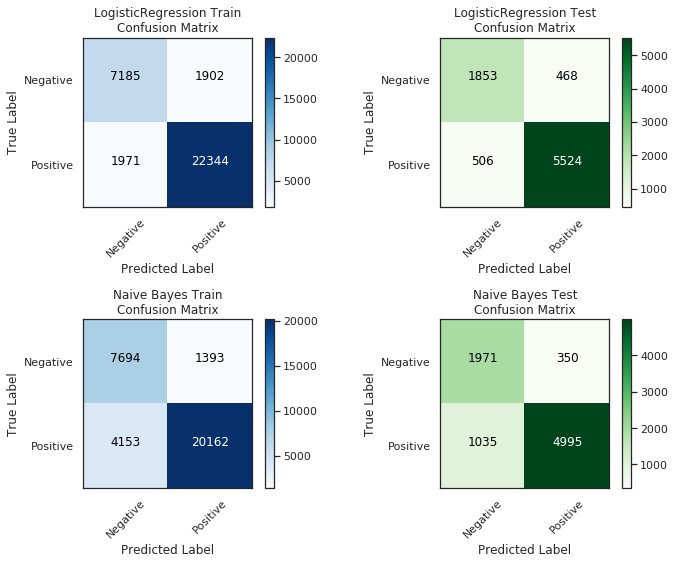

In [60]:
clf_tool.plot_confusion_matrix(classes=['Negative', 'Positive'])

<a id="6"></a>
<font color="darkslateblue" size=+2.5><b>6. Final Implementation</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Finally we can build up our final step to delivery a Sentiment Analysis model! We have a full prep pipeline, a machine learning model (to choose) and now the only thing we can do to improve it is to build a connected solution that can receive a input text string (say an e-commerce comment) and return its sentiment. Let's try!

In [61]:
# Defining a function to plot the sentiment of a given phrase
def sentiment_analysis(text, pipeline, vectorizer, model):
    """
    Args
    -----------
    text: text string / phrase / review comment to be analysed [type: string]
    pipeline: text prep pipeline built for preparing the corpus [type: sklearn.Pipeline]
    model: classification model trained to recognize positive and negative sentiment [type: model]
    """
    
    # Applying the pipeline
    if type(text) is not list:
        text = [text]
    text_prep = pipeline.fit_transform(text)
    matrix = vectorizer.transform(text_prep)
    
    # Predicting sentiment
    pred = model.predict(matrix)
    proba = model.predict_proba(matrix)
    
    # Plotting the sentiment and its score
    fig, ax = plt.subplots(figsize=(5, 3))
    if pred[0] == 1:
        text = 'Positive'
        class_proba = 100 * round(proba[0][1], 2)
        color = 'seagreen'
    else:
        text = 'Negative'
        class_proba = 100 * round(proba[0][0], 2)
        color = 'crimson'
    ax.text(0.5, 0.5, text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(class_proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment Analysis', fontsize=14)
    plt.show()

In [62]:
# Defining transformers for preparing the text input
model = clf_tool.classifiers_info['LogisticRegression']['estimator']
prod_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
    ('stemming', StemmingProcess(RSLPStemmer()))
])
vectorizer = text_pipeline.named_steps['text_features'].vectorizer

Now let's try to write a phrase to feed our `sentiment_analysis` function. In production, we can adapt it to serve any application. So, let's simulate an online review that says something like `Very bad product! I don't buy on this store anymore, the delivery was late and it cost so much money`.

What's the sentiment of this given phrase?

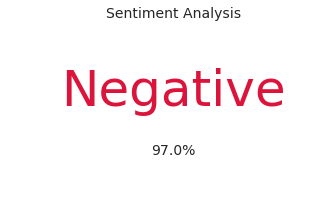

In [63]:
comment = 'Péssimo produto! Não compro nessa loja, a entrega atrasou e custou muito dinheiro!'
sentiment_analysis(comment, pipeline=prod_pipeline, vectorizer=vectorizer, model=model)

Excelent! Our model returned exactly we expected. Now, let' simulate a comment that says something like `I love it and it really fulfilled the expectations. I bought for a cheap value. Wonderful`.

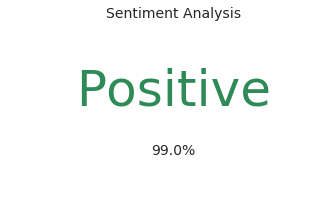

In [64]:
comment = 'Adorei e realmente cumpriu as expectativas. Comprei por um valor barato. Maravilhoso'
sentiment_analysis(comment, pipeline=prod_pipeline, vectorizer=vectorizer, model=model)

At least, let's try to simulate a very neutral comment. Something like `I don't know if a liked this product. The cost was cheap but it was defectuous. If you're lucky, it worths`

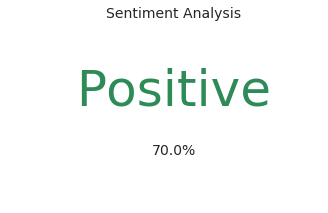

In [65]:
comment = 'Não sei gostei do produto. O custo foi barato mas veio com defeito. Se der sorte, vale a pena'
sentiment_analysis(comment, pipeline=prod_pipeline, vectorizer=vectorizer, model=model)

By the end, let's plot a WordCloud for positive and negative words on our dataset.

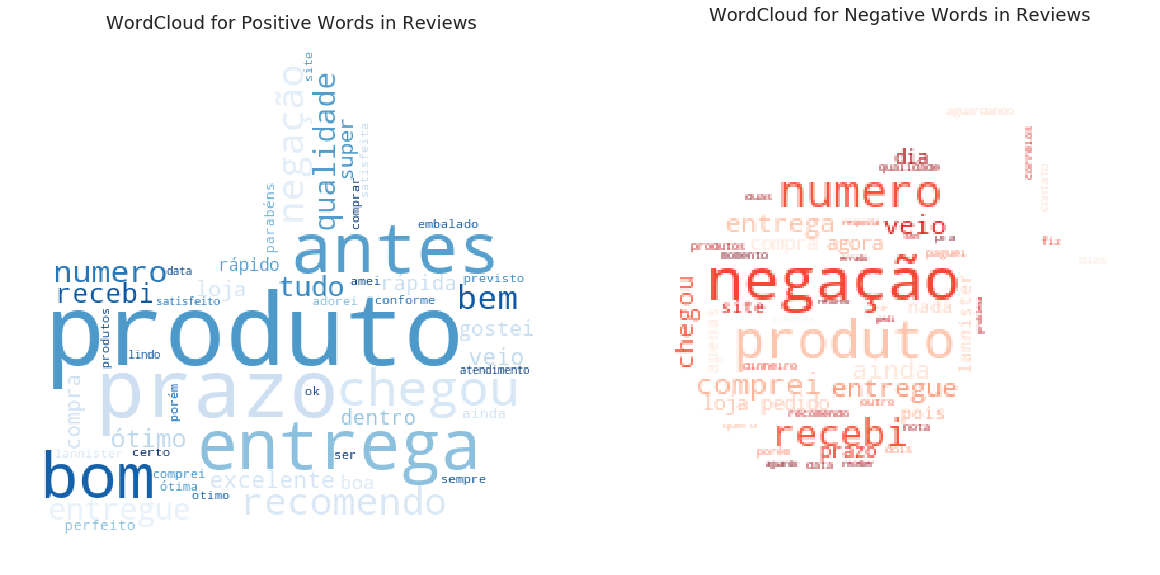

In [66]:
# Reading and preparing a mask for serving as wordcloud background
like_mask = np.array(Image.open("../input/imgicons/like.png"))
bomb_mask = np.array(Image.open("../input/imgicons/bomb3.png"))
#angry_mask = angry_mask[:, :, -1]

# Transforming like mask
transf_like_mask = np.ndarray((like_mask.shape[0], like_mask.shape[1]), np.int32)
for i in range(len(like_mask)):
    transf_like_mask[i] = [255 if px == 0 else 0 for px in like_mask[i]]

# Transforming angry mask
transf_bomb_mask = np.ndarray((bomb_mask.shape[0], bomb_mask.shape[1]), np.int32)
for i in range(len(bomb_mask)):
    transf_bomb_mask[i] = [255 if px == 0 else 0 for px in bomb_mask[i]]
    
# Generating words
pos_comments = list(df_comments.query('sentiment_label == "positive"')['stopwords_removed'].values)
positive_words = ' '.join(pos_comments).split(' ')
neg_comments = list(df_comments.query('sentiment_label == "negative"')['stopwords_removed'].values)
negative_words = ' '.join(neg_comments).split(' ')

# Using Counter for creating a dictionary counting
positive_dict = Counter(positive_words)
negative_dict = Counter(negative_words)

# Generating wordclouds for both positive and negative comments
positive_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42, mask=transf_like_mask,
                      colormap='Blues', background_color='white', max_words=50).generate_from_frequencies(positive_dict)
negative_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42, mask=transf_bomb_mask,
                      colormap='Reds', background_color='white', max_words=50).generate_from_frequencies(negative_dict)

# Visualizing the WC created and the total for each cuisine
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
ax1 = axs[0]
ax2 = axs[1]

ax1.imshow(positive_wc)
ax1.axis('off')
ax1.set_title('WordCloud for Positive Words in Reviews', size=18, pad=20)

ax2.imshow(negative_wc)
ax2.axis('off')
ax2.set_title('WordCloud for Negative Words in Reviews', size=18, pad=20)

plt.show()

<a id="7"></a>
<font color="darkslateblue" size=+2.5><b>7. Conclusion</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Well, it was a long journey and I hope you all had experienced a really explained and useful notebook for a Sentimental Analysis task. We could detail step by step on how to input a dataset with comment reviews of online purchasing operations and extract the sentiment of people that left their reviews. We now are able to expand this to a high level application that automatic detects the sentiment of a given text or phrase.



[](http://)<a id="8"></a>
<font color="darkslateblue" size=+2.5><b>8. Complete Script</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Now, by the end of our detailed implementation, I want to share with you how this project could be implemented as complete structure project in production. The script above is exactly the same the one I built in my machine to prepare myself for a real problem.

___
* _Project Transformers_
___

In [67]:
"""
This python script will allocate all the custom transformers that are specific for the project task.
The idea is to encapsulate the classes and functions used on pipelines to make codes cleaner.
"""

# Importing libraries
from sklearn.base import BaseEstimator, TransformerMixin


"""
-----------------------------------
----- 1. CUSTOM TRANSFORMERS ------
           1.1 Classes
-----------------------------------
"""


class ColumnMapping(BaseEstimator, TransformerMixin):
    """
    This class applies the map() function into a DataFrame for transforming a columns given a mapping dictionary

    Parameters
    ----------
    :param old_col_name: name of the columns where mapping will be applied [type: string]
    :param mapping_dict: python dictionary with key/value mapping [type: dict]
    :param new_col_name: name of the new column resulted by mapping [type: string, default: 'target]
    :param drop: flag that guides the dropping of the old_target_name column [type: bool, default: True]

    Returns
    -------
    :return X: pandas DataFrame object after mapping application [type: pd.DataFrame]

    Application
    -----------
    # Transforming a DataFrame column given a mapping dictionary
    mapper = ColumnMapping(old_col_name='col_1', mapping_dict=dictionary, new_col_name='col_2', drop=True)
    df_mapped = mapper.fit_transform(df)
    """

    def __init__(self, old_col_name, mapping_dict, new_col_name='target', drop=True):
        self.old_col_name = old_col_name
        self.mapping_dict = mapping_dict
        self.new_col_name = new_col_name
        self.drop = drop

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Applying mapping
        X[self.new_col_name] = X[self.old_col_name].map(self.mapping_dict)

        # Dropping the old columns (if applicable)
        if self.drop:
            X.drop(self.old_col_name, axis=1, inplace=True)

        return X

___
* _Complete Python Script for Training a Sentiment Classififier_
___

The code below is end-to-end solution for creating a sentiment classification model using the olist e-commerce reviews dataset. As I said before, this script was built on my personal machine, so I commented the lines of code that saves something on the fileserver.

In [68]:
"""
This python script are responsible for reading, preparing and training a sentiment classification model from
e-commerce reviews taken from brazilian web-sites

* Metadata can be find at: https://www.kaggle.com/olistbr/brazilian-ecommerce
* Reference notebook: ../notebooks/EDA_BrazilianECommerce.ipynb

--- SUMMARY ---

1. Project Variables
2. Reading Data
3. Prep Pipelines
    3.1 Initial Preparation
    3.2 Text Transformers
4. Modeling
    4.1 Model Training
    4.2 Evaluating Metrics
    4.3 Complete Solution
    4.4 Final Model Performance
    4.5 Saving pkl Files

---------------------------------------------------------------
Written by Thiago Panini - Latest version: September 24th 2020
---------------------------------------------------------------
"""


# Importing libs
import os
import numpy as np
import pandas as pd
#from dev.training.project_transformers import ColumnMapping
from custom_transformers import import_data, DropNullData, DropDuplicates
from text_utils import re_breakline, re_dates, re_hiperlinks, re_money, re_negation, re_numbers, \
    re_special_chars, re_whitespaces, ApplyRegex, StemmingProcess, StopWordsRemoval
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from joblib import dump
from sklearn.linear_model import LogisticRegression
from ml_utils import BinaryClassifiersAnalysis, cross_val_performance
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve


"""
-----------------------------------
------ 1. PROJECT VARIABLES -------
-----------------------------------
"""

# Variables for address paths
DATA_PATH = '../input/brazilian-ecommerce'
PIPELINES_PATH = '../../pipelines' # Take a look at your project structure
MODELS_PATH = '../../models' # Take a look at your project structure

# Variables for reading the data
FILENAME = 'olist_order_reviews_dataset.csv'
COLS_READ = ['review_comment_message', 'review_score']
CORPUS_COL = 'review_comment_message'
TARGET_COL = 'target'

# Defining stopwords
PT_STOPWORDS = stopwords.words('portuguese')

# Variables for saving data
METRICS_FILEPATH = 'metrics/model_performance.csv' # Take a look at your project structure

# Variables for retrieving model
MODEL_KEY = 'LogisticRegression'


"""
-----------------------------------
-------- 2. READING DATA ----------
-----------------------------------
"""

# Reading the data with text corpus and score
df = import_data(os.path.join(DATA_PATH, FILENAME), usecols=COLS_READ)


"""
-----------------------------------
------- 3. PREP PIPELINES ---------
    3.1 Initial Preparation
-----------------------------------
"""

# Creating a dictionary for mapping the target column based on review score
score_map = {
    1: 0,
    2: 0,
    3: 0,
    4: 1,
    5: 1
}

# Creating a pipeline for the initial prep on the data
initial_prep_pipeline = Pipeline([
    ('mapper', ColumnMapping(old_col_name='review_score', mapping_dict=score_map, new_col_name=TARGET_COL)),
    ('null_dropper', DropNullData()),
    ('dup_dropper', DropDuplicates())
])

# Applying initial prep pipeline
df_prep = initial_prep_pipeline.fit_transform(df)


"""
-----------------------------------
------- 3. PREP PIPELINES ---------
      3.2 Text Transformers
-----------------------------------
"""

# Defining regex transformers to be applied
regex_transformers = {
    'break_line': re_breakline,
    'hiperlinks': re_hiperlinks,
    'dates': re_dates,
    'money': re_money,
    'numbers': re_numbers,
    'negation': re_negation,
    'special_chars': re_special_chars,
    'whitespaces': re_whitespaces
}

# Building a text prep pipeline
text_prep_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(PT_STOPWORDS)),
    ('stemming', StemmingProcess(RSLPStemmer())),
    ('vectorizer', TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=PT_STOPWORDS))
])

# Applying the pipeline
X = df_prep[CORPUS_COL].tolist()
y = df_prep[TARGET_COL]
X_prep = text_prep_pipeline.fit_transform(X)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=.20, random_state=42)

# Saving states before prep pipeline
"""df_prep[CORPUS_COL].to_csv(os.path.join(DATA_PATH, 'X_data.csv'), index=False)
df_prep[TARGET_COL].to_csv(os.path.join(DATA_PATH, 'y_data.csv'), index=False)"""


"""
-----------------------------------
--------- 4. MODELING  -----------
       4.1 Model Training
-----------------------------------
"""

# Specifing a Logistic Regression model for sentiment classification
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

# Setting up the classifiers
set_classifiers = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': logreg_param_grid
    }
}

# Creating an object and training the classifiers
trainer = BinaryClassifiersAnalysis()
trainer.fit(set_classifiers, X_train, y_train, random_search=True, scoring='accuracy')


"""
-----------------------------------
--------- 4. MODELING  -----------
    4.2 Evaluating Metrics
-----------------------------------
"""

# Evaluating metrics
performance = trainer.evaluate_performance(X_train, y_train, X_test, y_test, cv=5, save=False,
                                           performances_filepath=METRICS_FILEPATH) # In your project env, save=True and overwrite=True may be useful


"""
-----------------------------------
--------- 4. MODELING  -----------
    4.3. Complete Solution
-----------------------------------
"""

# Returning the model to be saved
model = trainer.classifiers_info[MODEL_KEY]['estimator']

# Creating a complete pipeline for prep and predict
e2e_pipeline = Pipeline([
    ('text_prep', text_prep_pipeline),
    ('model', model)
])

# Defining a param grid for searching best pipelines options (reduced options for making the search faster)
"""param_grid = [{
    'text_prep__vectorizer__max_features': np.arange(500, 851, 50),
    'text_prep__vectorizer__min_df': [7, 9, 12, 15, 30],
    'text_prep__vectorizer__max_df': [.4, .5, .6, .7]
}]"""

param_grid = [{
    'text_prep__vectorizer__max_features': np.arange(500, 501, 50),
    'text_prep__vectorizer__min_df': [7],
    'text_prep__vectorizer__max_df': [.4]
}]

# Searching for best options
grid_search_prep = GridSearchCV(e2e_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_prep.fit(X, y)
print('Best params after a complete search:')
print(grid_search_prep.best_params_)

# Returning the best options
vectorizer_max_features = grid_search_prep.best_params_['text_prep__vectorizer__max_features']
vectorizer_min_df = grid_search_prep.best_params_['text_prep__vectorizer__min_df']
vectorizer_max_df = grid_search_prep.best_params_['text_prep__vectorizer__max_df']

# Updating the e2e pipeline with the best options found on search
e2e_pipeline.named_steps['text_prep'].named_steps['vectorizer'].max_features = vectorizer_max_features
e2e_pipeline.named_steps['text_prep'].named_steps['vectorizer'].min_df = vectorizer_min_df
e2e_pipeline.named_steps['text_prep'].named_steps['vectorizer'].max_df = vectorizer_max_df

# Fitting the model again
e2e_pipeline.fit(X, y)


"""
-----------------------------------
--------- 4. MODELING  -----------
    4.4 Final Model Performance
-----------------------------------
"""

# Retrieving performance for te final model after hyperparam updating
final_model = e2e_pipeline.named_steps['model']
final_performance = cross_val_performance(final_model, X_prep, y, cv=5)
final_performance = final_performance.append(performance)
print(final_performance)
#final_performance.to_csv(METRICS_FILEPATH, index=False)


"""
-----------------------------------
--------- 4. MODELING  -----------
      4.5 Saving pkl files
-----------------------------------
"""

"""# Creating folders for saving pkl files (if not exists)
if not os.path.exists('../../models'):
    os.makedirs('../../models')
if not os.path.exists('../../pipelines'):
    os.makedirs('../../pipelines')

# Saving pkl files
dump(initial_prep_pipeline, os.path.join(PIPELINES_PATH, 'initial_prep_pipeline.pkl'))
dump(text_prep_pipeline, os.path.join(PIPELINES_PATH, 'text_prep_pipeline.pkl'))
dump(e2e_pipeline, os.path.join(PIPELINES_PATH, 'e2e_pipeline.pkl'))
dump(final_model, os.path.join(MODELS_PATH, 'sentiment_clf_model.pkl'))"""

This dataset has 2 columns, which 1 is/are applicable to optimization.

----------------------------------------------------
Memory usage (50 lines): 0.0009 MB
Memory usage after optimization (50 lines): 0.0007 MB
----------------------------------------------------

Reduction of 21.55% on memory usage

Training model LogisticRegression

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


Evaluating model LogisticRegression

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


Best params after a complete search:
{'text_prep__vectorizer__max_df': 0.4, 'text_prep__vectorizer__max_features': 500, 'text_prep__vectorizer__min_df': 7}
      acc anomesdia         anomesdia_datetime          approach     auc  \
0  0.8793  20200925 2020-09-25 22:27:47.624533       Final Model  0.9377   
0  0.8798       NaN                        NaT  Treino 5 K-folds  0.9382   
0  0.8777       NaN                        NaT             Teste  0.9330   

       f1               model  precision  recall  total_time  
0  0.9009  LogisticRegression     0.9035  0.8984       2.852  
0  0.9012  LogisticRegression     0.9037  0.8987       2.235  
0  0.8999  LogisticRegression     0.9053  0.8946       0.017  


"# Creating folders for saving pkl files (if not exists)\nif not os.path.exists('../../models'):\n    os.makedirs('../../models')\nif not os.path.exists('../../pipelines'):\n    os.makedirs('../../pipelines')\n\n# Saving pkl files\ndump(initial_prep_pipeline, os.path.join(PIPELINES_PATH, 'initial_prep_pipeline.pkl'))\ndump(text_prep_pipeline, os.path.join(PIPELINES_PATH, 'text_prep_pipeline.pkl'))\ndump(e2e_pipeline, os.path.join(PIPELINES_PATH, 'e2e_pipeline.pkl'))\ndump(final_model, os.path.join(MODELS_PATH, 'sentiment_clf_model.pkl'))"

**References:**

https://www.kaggle.com/raenish/cheatsheet-text-helper-functions created by Raenish David

https://www.kaggle.com/andresionek/geospatial-analysis-of-brazilian-e-commerce created by Andre Sionek

<font size="+1" color="black"><b>Please visit my other kernels by clicking on the buttons</b></font><br>

<a href="https://www.kaggle.com/thiagopanini/predicting-restaurant-s-rate-in-bengaluru" class="btn btn-primary" style="color:white;">Bengaluru's Restaurants</a>
<a href="https://www.kaggle.com/thiagopanini/predicting-credit-risk-eda-viz-pipeline#Training-and-Evaluating-a-Model" class="btn btn-primary" style="color:white;">Credit Risk Detection</a>
<a href="https://www.kaggle.com/thiagopanini/credit-fraud-how-to-choose-the-best-classifier" class="btn btn-primary" style="color:white;">Credit Card Fraud Detection</a>
<a href="https://www.kaggle.com/thiagopanini/global-terrorism-eda-nlp" class="btn btn-primary" style="color:white;">Global Terrorism</a>